# Forecasting

## Summary

| #   |Method Name                                              |mean squared error  |mean absolute error|
|:----|---------------------------------------------------------|-------------------:|------------------:|
| 01  | Pandas moving average - pre-grouped by month (3 month)  | 234418077.64       | 10567.13          |
| 2A  | Pandas moving average - pre-grouped by day (3 day)      | 916610.99          | 645.74            |   
| 2B  | Pandas moving average - pre-grouped by day post-grouped by month (3 day)   | 75117338.43        | 3303.45           |

## References

* https://machinelearningmastery.com/moving-average-smoothing-for-time-series-forecasting-python/
* https://www.kaggle.com/code/carlmcbrideellis/time-series-a-simple-moving-average-ma-model


## Loading Libraries and datasets

In [4]:
# Importing data analytics libraries
import pandas as pd
import numpy as np

In [86]:
# Importing visualizing libraries
import matplotlib.pyplot as plt
import seaborn as sns
#Setting parameters for plot fig size
plt.rcParams["figure.figsize"] = (20,16)

In [6]:
# Importing performance metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [7]:
# Reading the cleaned and feature-engineered test dataset
df_test = pd.read_csv('../competitive-data-science-final-project/sales_test_with_target.csv')

In [8]:
# Reading the cleaned and feature-engineered train dataset
df = pd.read_csv('../competitive-data-science-final-project/new_sales_train.csv')

In [9]:
df.head()

,date,date_block_num,shop_id,item_id,item_cnt_day,Month,Year,DayofWeek,item_category_id,Holiday
0,2013-01-01,0,2,991,1.0,1,2013,1,67,True
1,2013-01-01,0,2,1472,1.0,1,2013,1,23,True
2,2013-01-01,0,2,1905,1.0,1,2013,1,30,True
3,2013-01-01,0,2,2920,2.0,1,2013,1,21,True
4,2013-01-01,0,2,3320,1.0,1,2013,1,19,True


In [10]:
df.tail()

,date,date_block_num,shop_id,item_id,item_cnt_day,Month,Year,DayofWeek,item_category_id,Holiday
2882303,2015-09-30,32,59,15069,1.0,9,2015,2,28,False
2882304,2015-09-30,32,59,15255,1.0,9,2015,2,63,False
2882305,2015-09-30,32,59,15256,2.0,9,2015,2,63,False
2882306,2015-09-30,32,59,16184,1.0,9,2015,2,65,False
2882307,2015-09-30,32,59,22088,1.0,9,2015,2,83,False


## Grouping the dataframes to get one row each for the measured time unit

In [11]:
# Grouping by date_block_num to get monthly item_cnt_day sum
df_monthly = df.groupby(df.date_block_num)[["item_cnt_day"]].sum()
df_monthly.tail()

,item_cnt_day
date_block_num,
28,72295.0
29,64114.0
30,63187.0
31,66079.0
32,72843.0


In [12]:
# Grouping the test data - Monthly
df_monthly_test = df_test.groupby(df_test.date_block_num)[["item_cnt_day"]].sum()

In [13]:
# Grouping by date to get daily item_cnt_day sum
df_daily = df.groupby(df.date)[["item_cnt_day"]].sum()
df_daily.tail()

,item_cnt_day
date,
2015-09-26,3075.0
2015-09-27,2818.0
2015-09-28,2275.0
2015-09-29,4209.0
2015-09-30,4068.0


In [14]:
# Grouping the test data - Daily
df_daily_test = df_test.groupby(df_test.date)[["item_cnt_day"]].sum()
df_daily_test.tail()

,item_cnt_day
date,
2015-10-27,1551.0
2015-10-28,3593.0
2015-10-29,1589.0
2015-10-30,2274.0
2015-10-31,3104.0


## **Cheking for any missing dates**

In [15]:
dates_df = df_daily.copy()

# Setting the Date values as index
#dates_df = dates_df.set_index('date')
 
# to_datetime() method converts string
# format to a DateTime object
#dates_df.index = pd.to_datetime(dates_df.index)
 
# dates which are not in the sequence
# are returned
print(pd.date_range(
  start="2013-01-01", end="2015-09-30").difference(dates_df.index))

# No missing dates

DatetimeIndex([], dtype='datetime64[ns]', freq=None)


# 1. Pandas moving average - grouped by month - 3 month

In [16]:
# Making a copy of the data frame
df_monthly_train = df_monthly.copy()

In [17]:
# Adding rolling average column for 3 month rolling average
df_monthly_train["rolling_av3"] = df_monthly_train["item_cnt_day"].rolling(3).mean().round(2)
df_monthly_train.tail()
#mean_squared_error(df_monthly_train.item_cnt_day[2:-1], df_monthly_train.rolling_av3[2:-1])

,item_cnt_day,rolling_av3
date_block_num,,
28,72295.0,77378.67
29,64114.0,71412.00
30,63187.0,66532.00
31,66079.0,64460.00
32,72843.0,67369.67


In [18]:
# Adding the rolling average of month 32 as the actual for month 33 to predict the average for month 33 
df_monthly_train.loc[len(df_monthly_train)] = [df_monthly_train.rolling_av3[32], " "]
df_monthly_train.tail()

,item_cnt_day,rolling_av3
date_block_num,,
29,64114.00,71412.0
30,63187.00,66532.0
31,66079.00,64460.0
32,72843.00,67369.67
33,67369.67,


In [19]:
df_monthly_train.head()

,item_cnt_day,rolling_av3
date_block_num,,
0,131478.0,NaN
1,128090.0,NaN
2,147142.0,135570.0
3,107190.0,127474.0
4,106970.0,120434.0


In [20]:
# Predicting the rolling average for month 33 in a seperate column
df_monthly_train["rolling_av3_1"] = df_monthly_train["item_cnt_day"].rolling(3).mean().round(2)
df_monthly_train.tail()

,item_cnt_day,rolling_av3,rolling_av3_1
date_block_num,,,
29,64114.00,71412.0,71412.00
30,63187.00,66532.0,66532.00
31,66079.00,64460.0,64460.00
32,72843.00,67369.67,67369.67
33,67369.67,,68763.89


In [21]:
df_monthly_train.head()

,item_cnt_day,rolling_av3,rolling_av3_1
date_block_num,,,
0,131478.0,NaN,NaN
1,128090.0,NaN,NaN
2,147142.0,135570.0,135570.0
3,107190.0,127474.0,127474.0
4,106970.0,120434.0,120434.0


In [22]:
# Replacing the item_cnt_day value for month 33 with test data and calculating the MSE and MAE
actual_val = float(df_monthly_test.item_cnt_day.iloc[0])
#df.at['C', 'x'] = 10
df_monthly_train.at[33,"item_cnt_day"] = actual_val
df_monthly_train.tail()

,item_cnt_day,rolling_av3,rolling_av3_1
date_block_num,,,
29,64114.0,71412.0,71412.00
30,63187.0,66532.0,66532.00
31,66079.0,64460.0,64460.00
32,72843.0,67369.67,67369.67
33,71056.0,,68763.89


In [23]:
df_monthly_train.head()

,item_cnt_day,rolling_av3,rolling_av3_1
date_block_num,,,
0,131478.0,NaN,NaN
1,128090.0,NaN,NaN
2,147142.0,135570.0,135570.0
3,107190.0,127474.0,127474.0
4,106970.0,120434.0,120434.0


In [24]:
#mean squared error (y_true, y_pred)
mean_squared_error(df_monthly_train.item_cnt_day[2:], df_monthly_train.rolling_av3_1[2:])


234418077.64107814

In [25]:
#mean_absolute_error(y_true, y_pred)
mean_absolute_error(df_monthly_train.item_cnt_day[2:], df_monthly_train.rolling_av3_1[2:])


10567.1390625

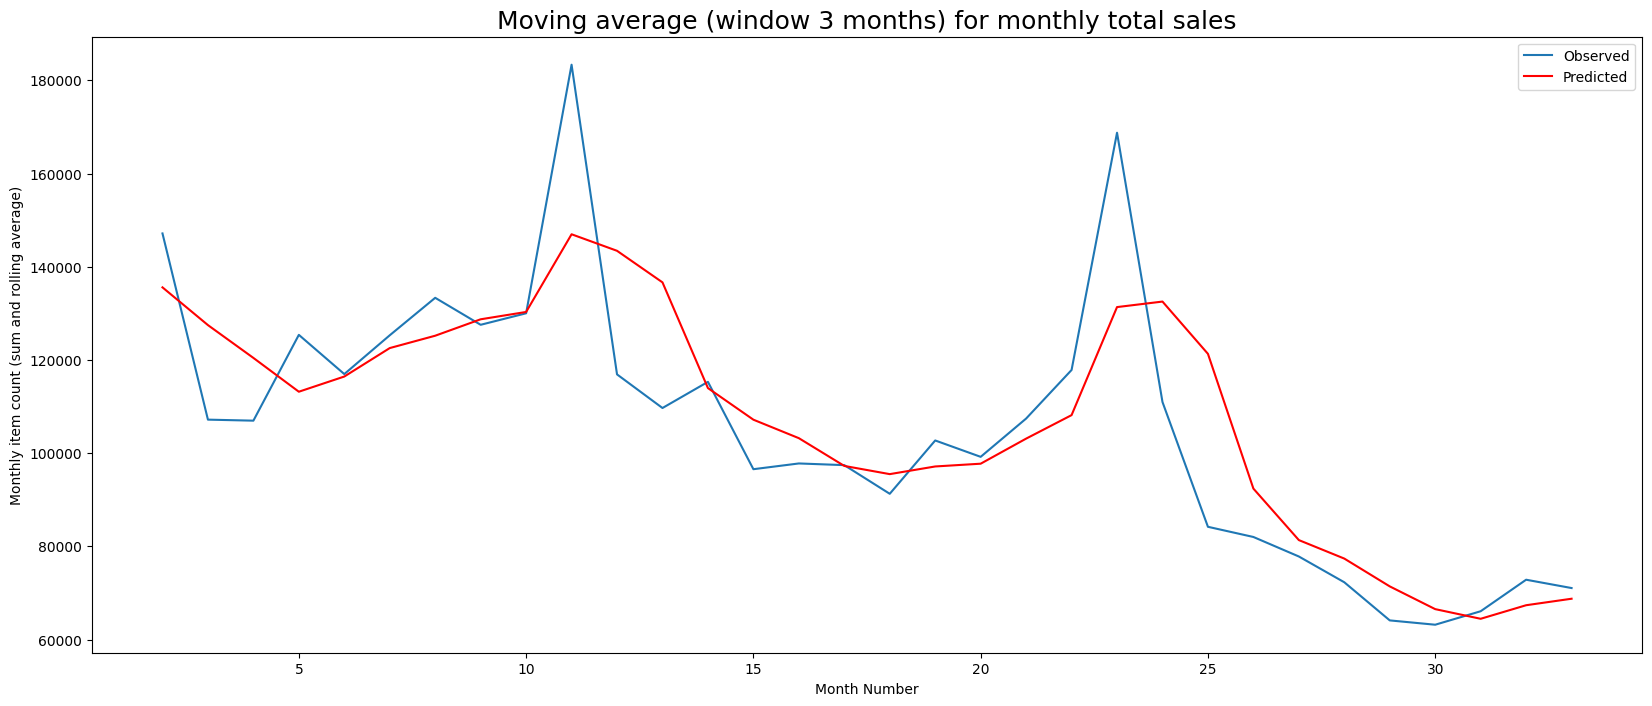

In [26]:
plt.plot(df_monthly_train.item_cnt_day[2:])
plt.plot(df_monthly_train.rolling_av3_1[2:], color='red')
plt.title("Moving average (window 3 months) for monthly total sales",
         fontsize = 18)
plt.xlabel("Month Number")
plt.ylabel("Monthly item count (sum and rolling average)")
plt.legend(["Observed", "Predicted"])
plt.show()

# 2A. Pandas moving average - daily - 3 day

In [27]:
# Making a copy of the data frame
df_daily_train = df_daily.copy()
df_daily_train.tail()

,item_cnt_day
date,
2015-09-26,3075.0
2015-09-27,2818.0
2015-09-28,2275.0
2015-09-29,4209.0
2015-09-30,4068.0


In [28]:
# Adding rolling average column for 3 day rolling average
df_daily_train["rolling_av3"] = df_daily_train["item_cnt_day"].rolling(3).mean().round(2)
df_daily_train.tail()

,item_cnt_day,rolling_av3
date,,
2015-09-26,3075.0,2452.67
2015-09-27,2818.0,2736.67
2015-09-28,2275.0,2722.67
2015-09-29,4209.0,3100.67
2015-09-30,4068.0,3517.33


In [29]:
length = len(df_daily_train)
length

1003

In [30]:
#df_daily_train.item_cnt_day[length-1]

In [31]:
# Adding the rolling average of month 32 as the actual for month 33 to predict the average for month 33 
#df_monthly_train.loc[len(df_monthly_train)] = [df_monthly_train.rolling_av3[32], " "]
#df_monthly_train.tail()

In [32]:
d = 1002
i = 0
while (d < 1033):
    df_daily_train["rolling_av3"] = df_daily_train["item_cnt_day"].rolling(3).mean().round(2)
    #df.at[4, 'B']
    df_daily_train.at[df_daily_test.index[i], "item_cnt_day"] = df_daily_train.rolling_av3[len(df_daily_train) - 1]
    d = d + 1
    i = i + 1
    #len(df_daily_train)
    #
df_daily_train["rolling_av3"] = df_daily_train["item_cnt_day"].rolling(3).mean().round(2)
print('Rolling average calculated')
# replace test data range of item_cnt_day with actual values
i = 0
while (i < len(df_daily_test)):
    df_daily_train.item_cnt_day[length + i] = df_daily_test.item_cnt_day[i]
    i = i + 1
print("item_cnt_day replaced by original values")

Rolling average calculated
item_cnt_day replaced by original values


In [33]:
#df_daily_train.head()

In [34]:
#df_daily_train.tail(33)

In [35]:
#mean squared error (y_true, y_pred)
mean_squared_error(df_daily_train.item_cnt_day[2:], df_daily_train.rolling_av3[2:])

916610.9981930233

In [36]:
#mean_absolute_error(y_true, y_pred)
mean_absolute_error(df_daily_train.item_cnt_day[2:], df_daily_train.rolling_av3[2:])

645.7462209302325

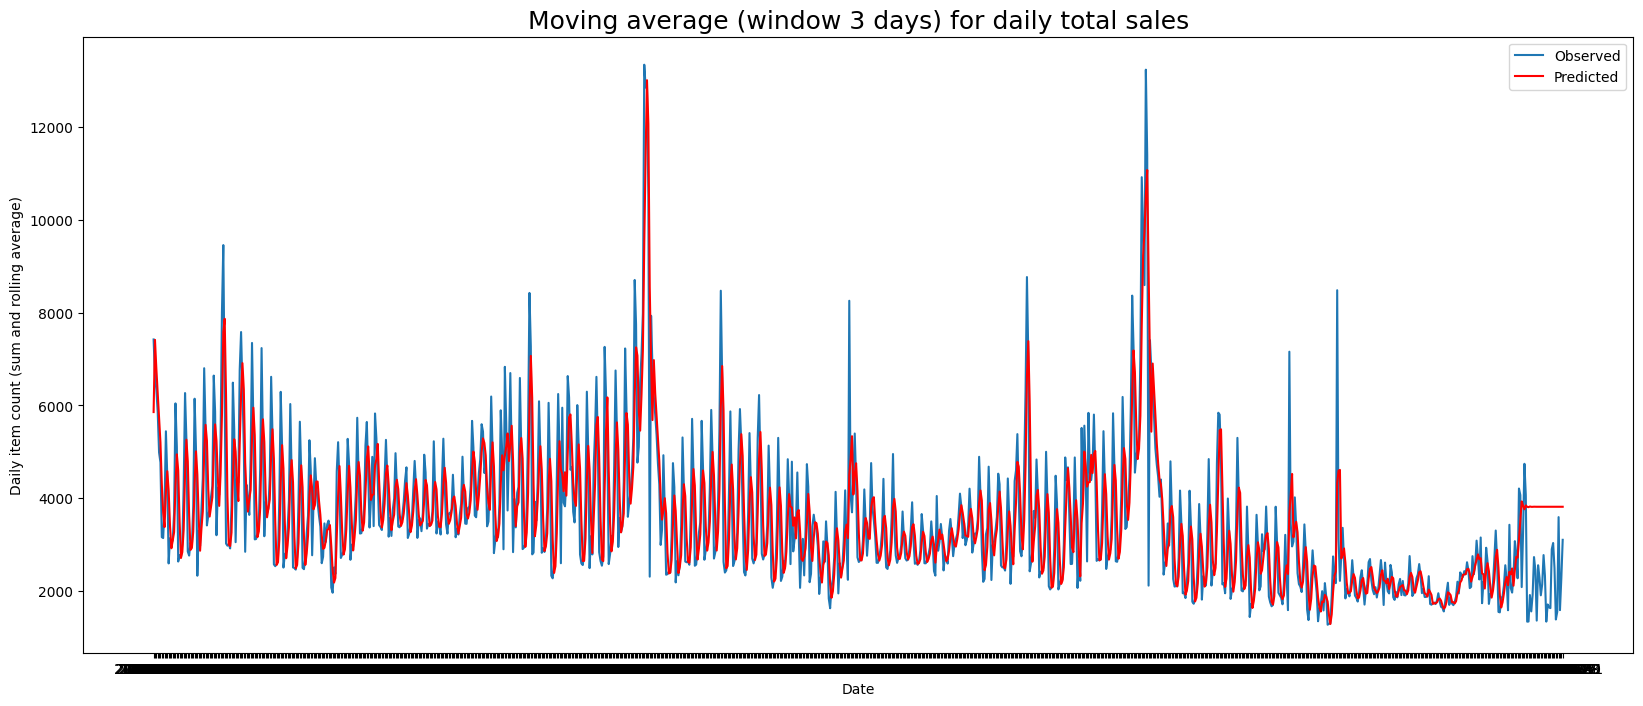

In [37]:
plt.plot(df_daily_train.item_cnt_day[2:])
plt.plot(df_daily_train.rolling_av3[2:], color='red')
plt.title("Moving average (window 3 days) for daily total sales",
         fontsize = 18)
plt.xlabel("Date")
plt.ylabel("Daily item count (sum and rolling average)")
plt.legend(["Observed", "Predicted"])
plt.show()

# 2B. Pandas moving average - daily - 3 day (Grouped by Month)

In [38]:
# Grouping the results by month
df_daily_train.head()
temp_monthly = df_daily_train.reset_index()
temp_monthly

,date,item_cnt_day,rolling_av3
0,2013-01-01,1951.0,NaN
1,2013-01-02,8198.0,NaN
2,2013-01-03,7422.0,5857.00
3,2013-01-04,6617.0,7412.33
4,2013-01-05,6345.0,6794.67
...,...,...,...
1029,2015-10-27,1551.0,3816.17
1030,2015-10-28,3593.0,3816.17
1031,2015-10-29,1589.0,3816.17
1032,2015-10-30,2274.0,3816.17


In [39]:
type(temp_monthly.date[0])
temp_monthly['date']= pd.to_datetime(temp_monthly['date'])

In [40]:
temp_monthly.head()

,date,item_cnt_day,rolling_av3
0,2013-01-01,1951.0,NaN
1,2013-01-02,8198.0,NaN
2,2013-01-03,7422.0,5857.00
3,2013-01-04,6617.0,7412.33
4,2013-01-05,6345.0,6794.67


In [41]:
temp_monthly.index = temp_monthly['date']
temp_monthly = temp_monthly.groupby(pd.Grouper(freq='M'))[["item_cnt_day", "rolling_av3"]].sum()

In [42]:
temp_monthly

,item_cnt_day,rolling_av3
date,,
2013-01-31,131478.0,124440.00
2013-02-28,128090.0,128143.99
2013-03-31,147142.0,144307.70
2013-04-30,107190.0,109441.99
2013-05-31,106970.0,106585.30
2013-06-30,125381.0,124823.64
2013-07-31,116966.0,117998.67
2013-08-31,125291.0,123390.64
2013-09-30,133332.0,135052.01


In [43]:
#mean squared error (y_true, y_pred)
mean_squared_error(temp_monthly.item_cnt_day, temp_monthly.rolling_av3)

75117338.43258236

In [44]:
#mean_absolute_error(y_true, y_pred)
mean_absolute_error(temp_monthly.item_cnt_day, temp_monthly.rolling_av3)

3303.458235294118

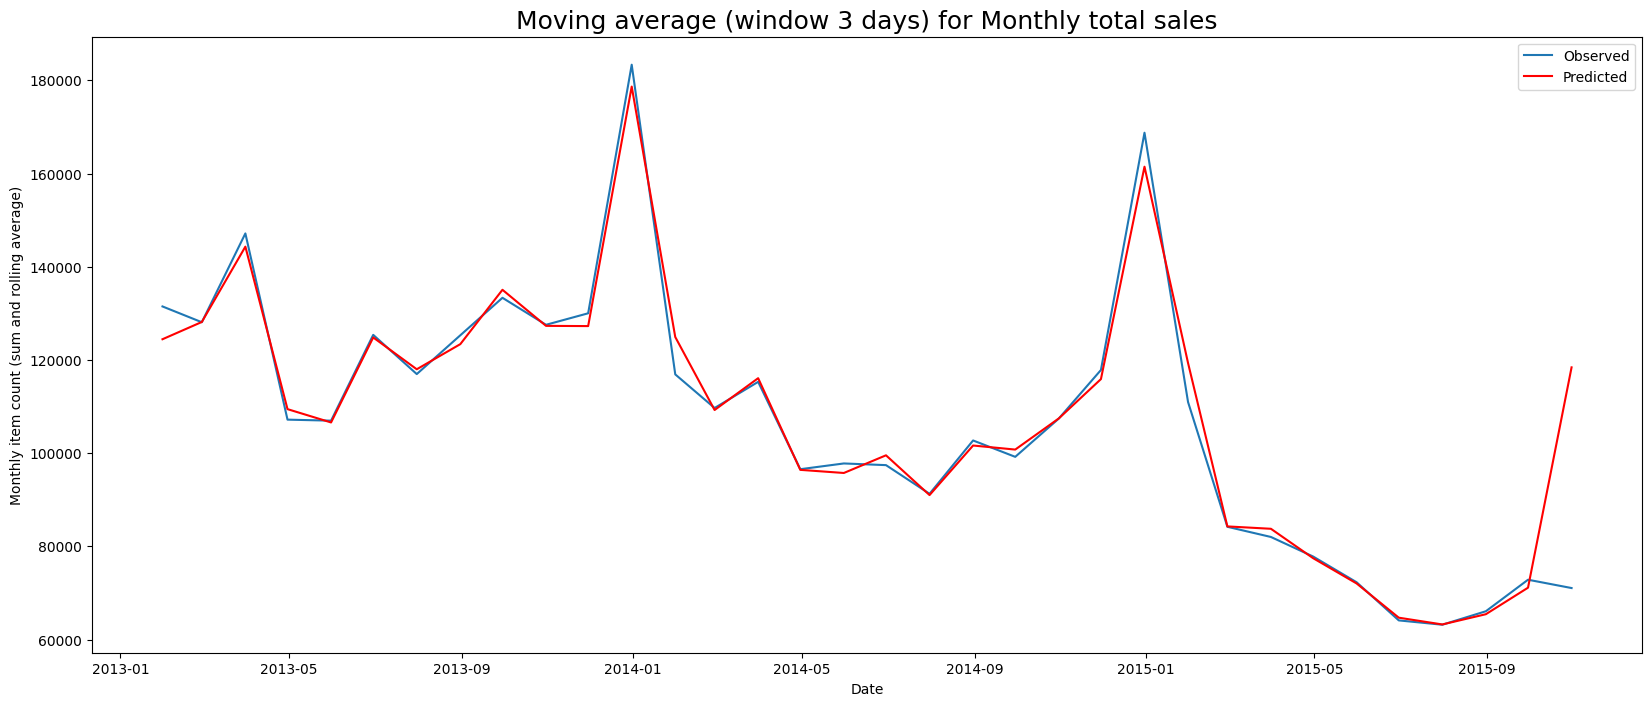

In [45]:
plt.plot(temp_monthly.item_cnt_day)
plt.plot(temp_monthly.rolling_av3, color='red')
plt.title("Moving average (window 3 days) for Monthly total sales",
         fontsize = 18)
plt.xlabel("Date")
plt.ylabel("Monthly item count (sum and rolling average)")
plt.legend(["Observed", "Predicted"])
plt.show()

# 3. ARIMA - Monthly

Reference: https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

AR - Autoregression: uses the dependent relationship between an observation and some number of lagged observations.

I  - Integrated: The use of differencing of raw observations in order to make the time series stationary

MA - Moving Average: uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.


**The parameters of the ARIMA**


p: lag order - The number of lag observations included in the model.

d: degree of differencing - The number of times that the raw observations are differenced.

q: order of moving average - The size of the moving average window.

### 1. Rearranging the dataframe to be used in ARIMA model

In [46]:
df_for_arima = df_daily.copy().reset_index()

In [47]:
df_for_arima.tail()

,date,item_cnt_day
998,2015-09-26,3075.0
999,2015-09-27,2818.0
1000,2015-09-28,2275.0
1001,2015-09-29,4209.0
1002,2015-09-30,4068.0


In [48]:
df_for_arima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1003 non-null   object 
 1   item_cnt_day  1003 non-null   float64
dtypes: float64(1), object(1)
memory usage: 15.8+ KB


In [49]:
df_for_arima.date = pd.to_datetime(df_for_arima.date)
df_for_arima = df_for_arima.resample(rule='M', on='date')['item_cnt_day'].sum()
df_for_arima.head()

date
2013-01-31    131478.0
2013-02-28    128090.0
2013-03-31    147142.0
2013-04-30    107190.0
2013-05-31    106970.0
Freq: M, Name: item_cnt_day, dtype: float64

In [50]:
df_for_arima.tail()

date
2015-05-31    72295.0
2015-06-30    64114.0
2015-07-31    63187.0
2015-08-31    66079.0
2015-09-30    72843.0
Freq: M, Name: item_cnt_day, dtype: float64

### 2. Visualizing the dataset

Text(0, 0.5, 'Total item count of the month')

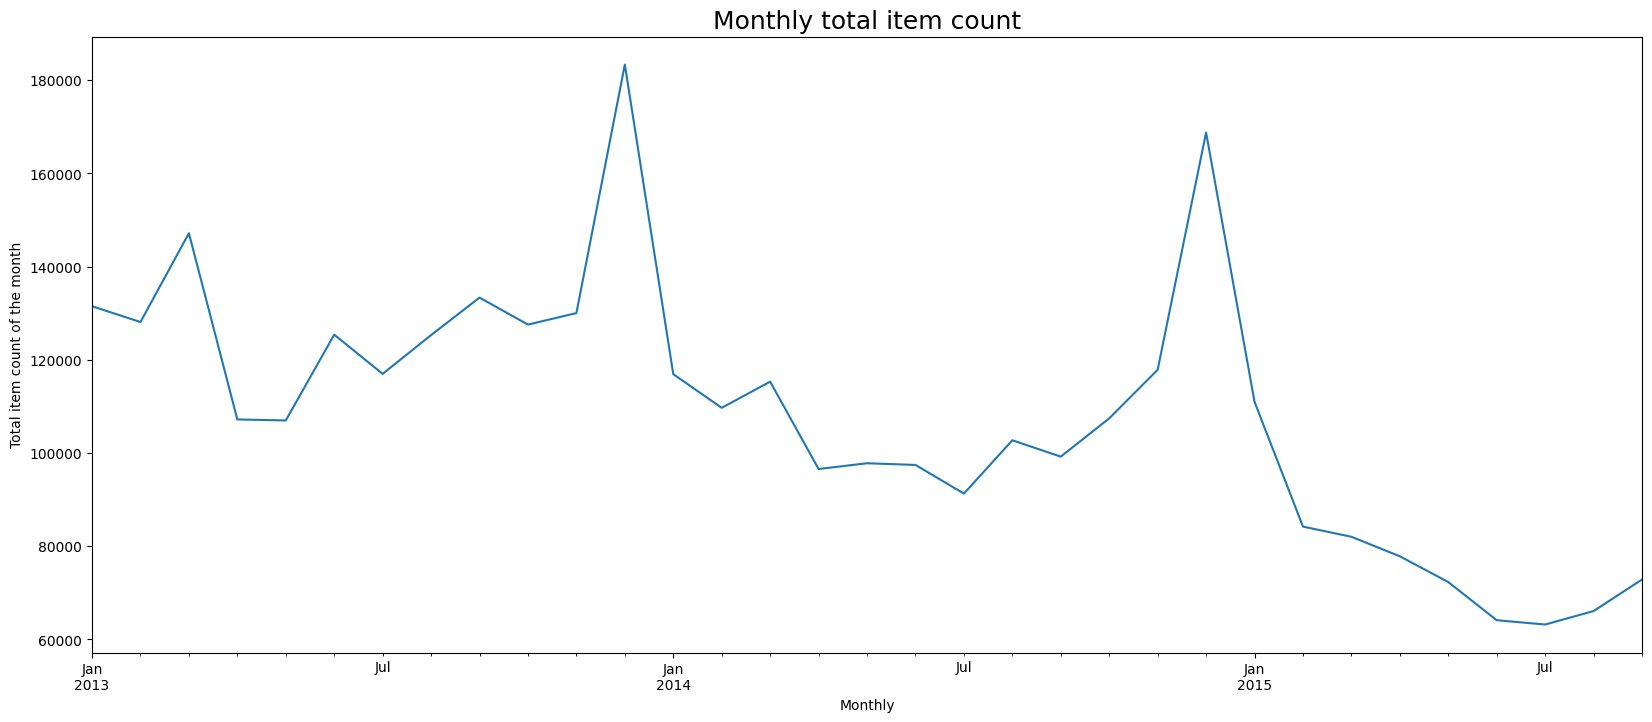

In [51]:
df_for_arima.plot()
plt.title("Monthly total item count",
         fontsize = 18)
plt.xlabel("Monthly")
plt.ylabel("Total item count of the month")

### 3. Looking at the autocorrelation plot of the time series

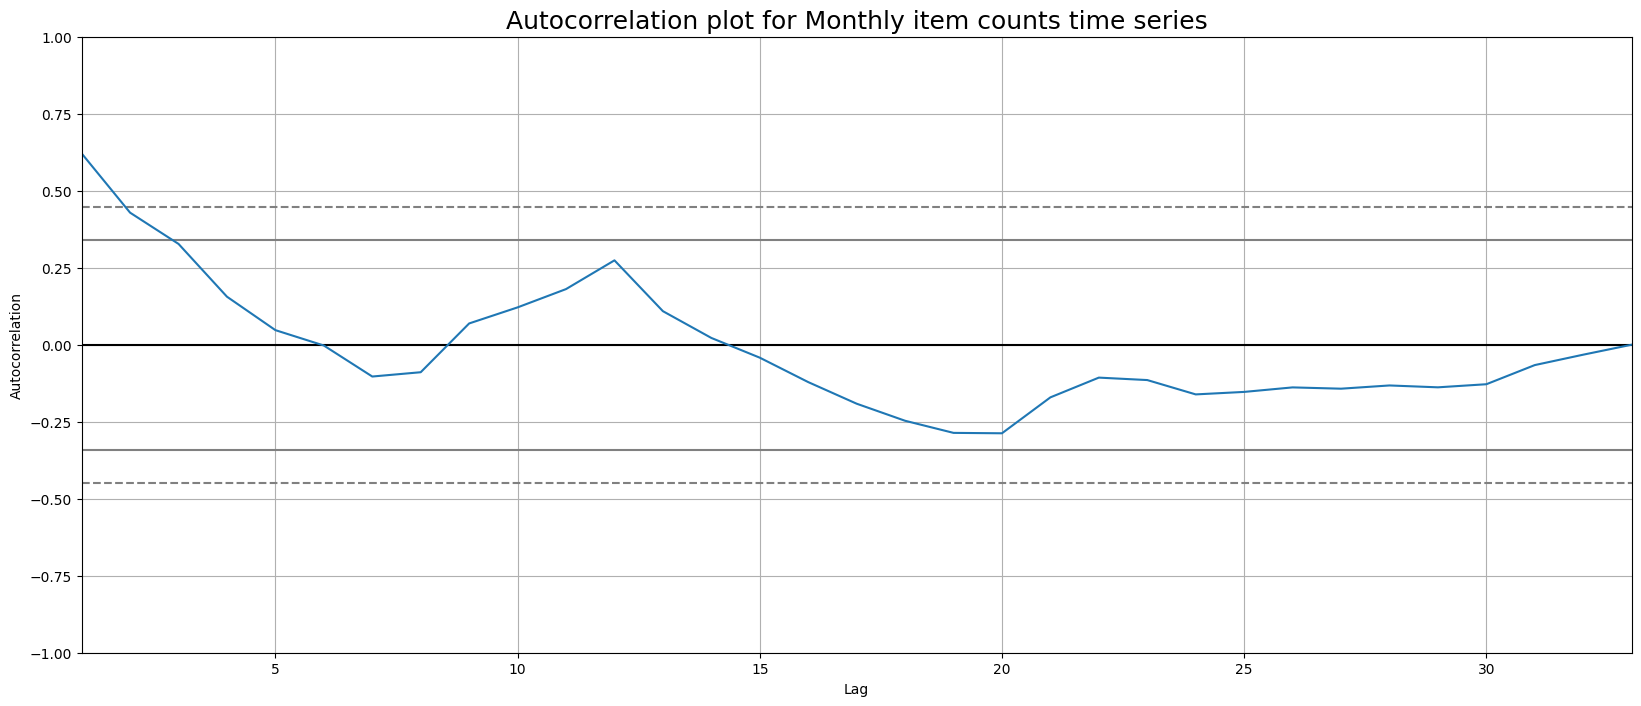

In [52]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df_for_arima)
#x = np.arange(0, 35, 1)
plt.title("Autocorrelation plot for Monthly item counts time series",
         fontsize = 18)
#plt.xticks(x)
plt.show()

In [53]:
# https://www.tutorialspoint.com/why-do-time-series-have-to-be-stationary-before-analysis
# https://medium.com/analytics-vidhya/interpreting-acf-or-auto-correlation-plot-d12e9051cd14

In [54]:
# The autocorrelation plot shows a slight downward trend and seasonality that keeps repeating every ~ 12 months

In [55]:
# Having a look at the distribution, seasonality and trend
# https://machinelearningmastery.com/time-series-data-stationary-python/

### 4. Looking at summary statistics

Text(0.5, 1.0, 'Distribution histogram')

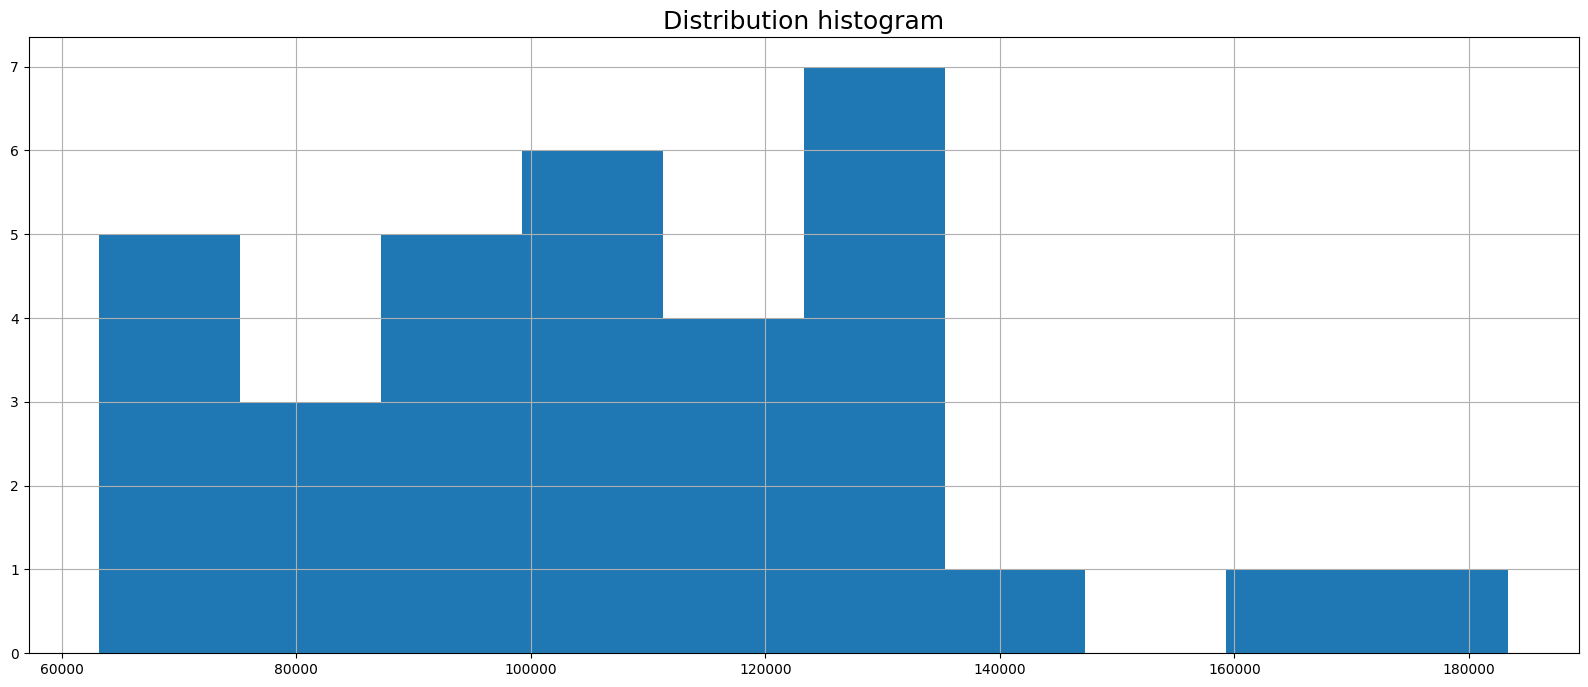

In [56]:
# Checking whether the data forms a normal distribution
# Checking if assuming a Gaussian distribution makes sense in this case by 
# plotting the values of the time series as a histogram
df_for_arima.hist()
plt.title("Distribution histogram",
         fontsize = 18)

**The histogram does not fit a bell curve shape, it is not normally distributed**

### 5. Looking at further summary statistics

In [57]:
# Split the time series into two contiguous sequences. 
# Calculate the mean and variance of each group of numbers and compare the values.
X = df_for_arima.values
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=125073.062500, mean2=92704.411765
variance1=372304927.183594, variance2=633841344.242215


In [58]:
#  The mean and variance of each half of the data look very different
print("diff mean = ", (mean1 - mean2).round())
print("diff variance = ", (var2 - var1).round())

diff mean =  32369.0
diff variance =  261536417.0



**distribution of values does not look like a Gaussian, therefore the mean and variance values are less meaningful**



### 6. Looking at the log values distribution

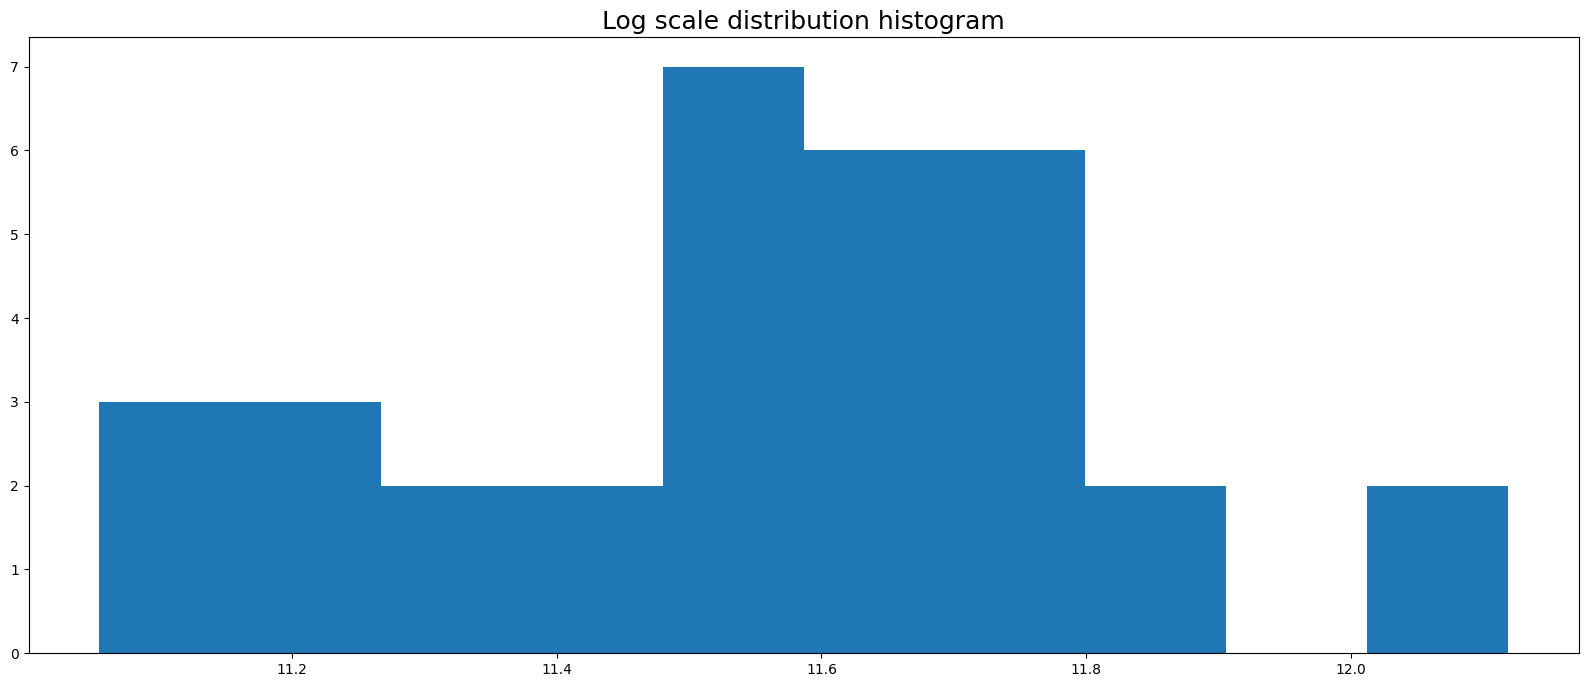

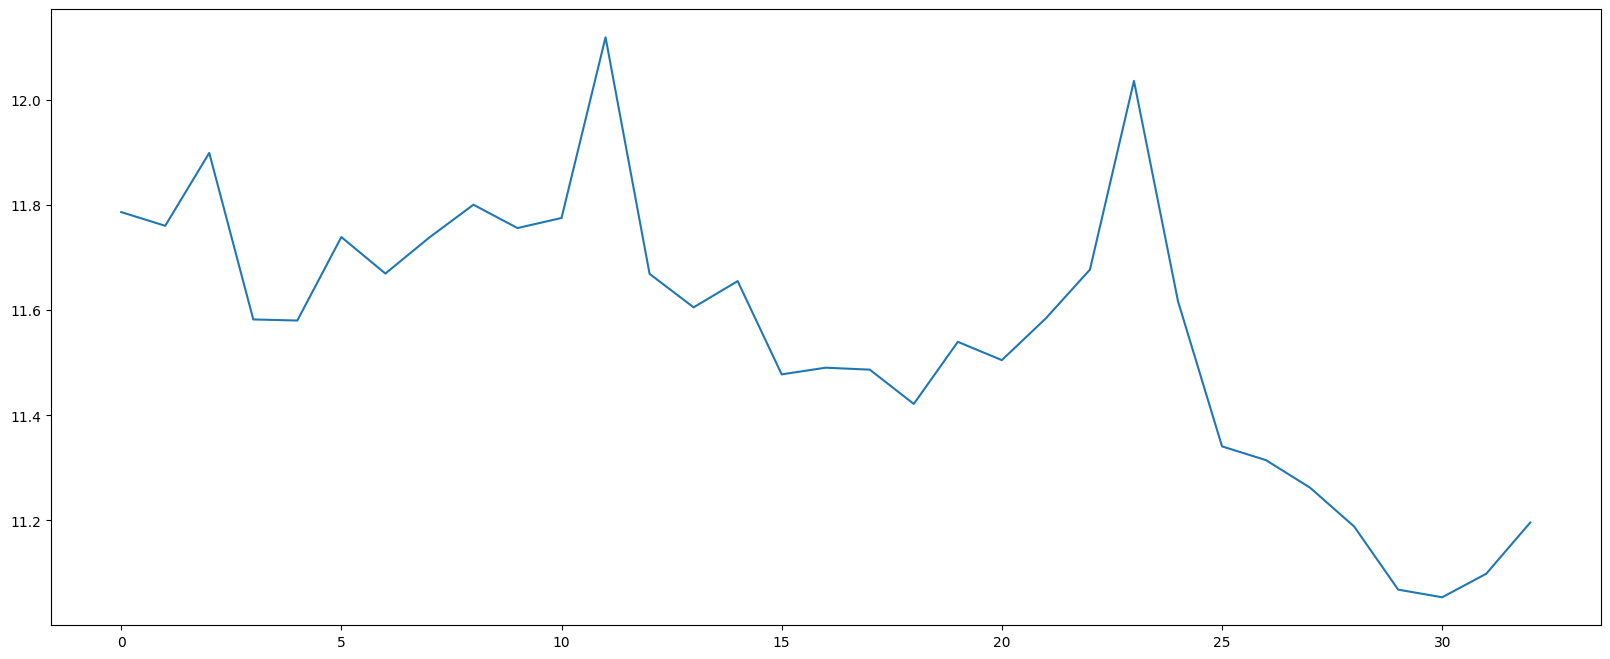

In [59]:
# This may suggest exponential growth from season to season.
# A log transform can flatten exponential change back to a linear relationship.
X = df_for_arima.values
X = np.log(X)
plt.title("Log scale distribution histogram",
         fontsize = 18)
plt.hist(X)
plt.show()
plt.plot(X)
plt.show()



**The log scale histogram looks somewhat normally distributed**



### 7. Looking at summary statistics of log-transformed data

In [60]:
#Calculating the mean and standard deviation of the values of the log-transformed dataset.
X = df_for_arima.values
X = np.log(X)
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=11.725930, mean2=11.404824
variance1=0.020501, variance2=0.061514


In [61]:
# mean and standard deviation values for each group that are similar, but not identical.
print("diff mean = ", (mean1 - mean2).round(5))
print("diff variance = ", (var2 - var1).round(5))

diff mean =  0.32111
diff variance =  0.04101


### 8. Augmented Dickey-Fuller test

Theory:

Using a statistical test to check if the difference between two samples of Gaussian random variables is real or a statistical fluke. 

Null Hypothesis (H0): 

* If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. 
* It has some time dependent structure.

Alternate Hypothesis (H1): 

* The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. 
* It does not have time-dependent structure.

p-value
    
* p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
* p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [62]:
from statsmodels.tsa.stattools import adfuller

X = df_for_arima.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))


ADF Statistic: -2.431387
p-value: 0.133073
Critical Values:
	1%: -3.654
	5%: -2.957
	10%: -2.618


**p-value is > 0.05, the data fails to reject the null hypothesis.**
    
**The data has a unit root and is non-stationary**


### 9. Running the Augmented Dickey-Fuller test for log values of the data

In [63]:
X = df_for_arima.values
X = np.log(X)
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.781230
p-value: 0.389820
	1%: -3.654
	5%: -2.957
	10%: -2.618



**p-value is lesser than before but it is still > 0.05, the data fails to reject the null hypothesis.**

**The data has a unit root and is non-stationary**


### 10. Trying to fit an ARIMA(5,1,0) model

In [64]:
from statsmodels.tsa.arima.model import ARIMA

                               SARIMAX Results                                
Dep. Variable:           item_cnt_day   No. Observations:                   33
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -365.920
Date:                Sun, 18 Jun 2023   AIC                            743.840
Time:                        19:50:17   BIC                            752.635
Sample:                    01-31-2013   HQIC                           746.756
                         - 09-30-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2026      0.101     -2.008      0.045      -0.400      -0.005
ar.L2         -0.1028      0.126     -0.814      0.416      -0.351       0.145
ar.L3         -0.1346      0.163     -0.827      0.4

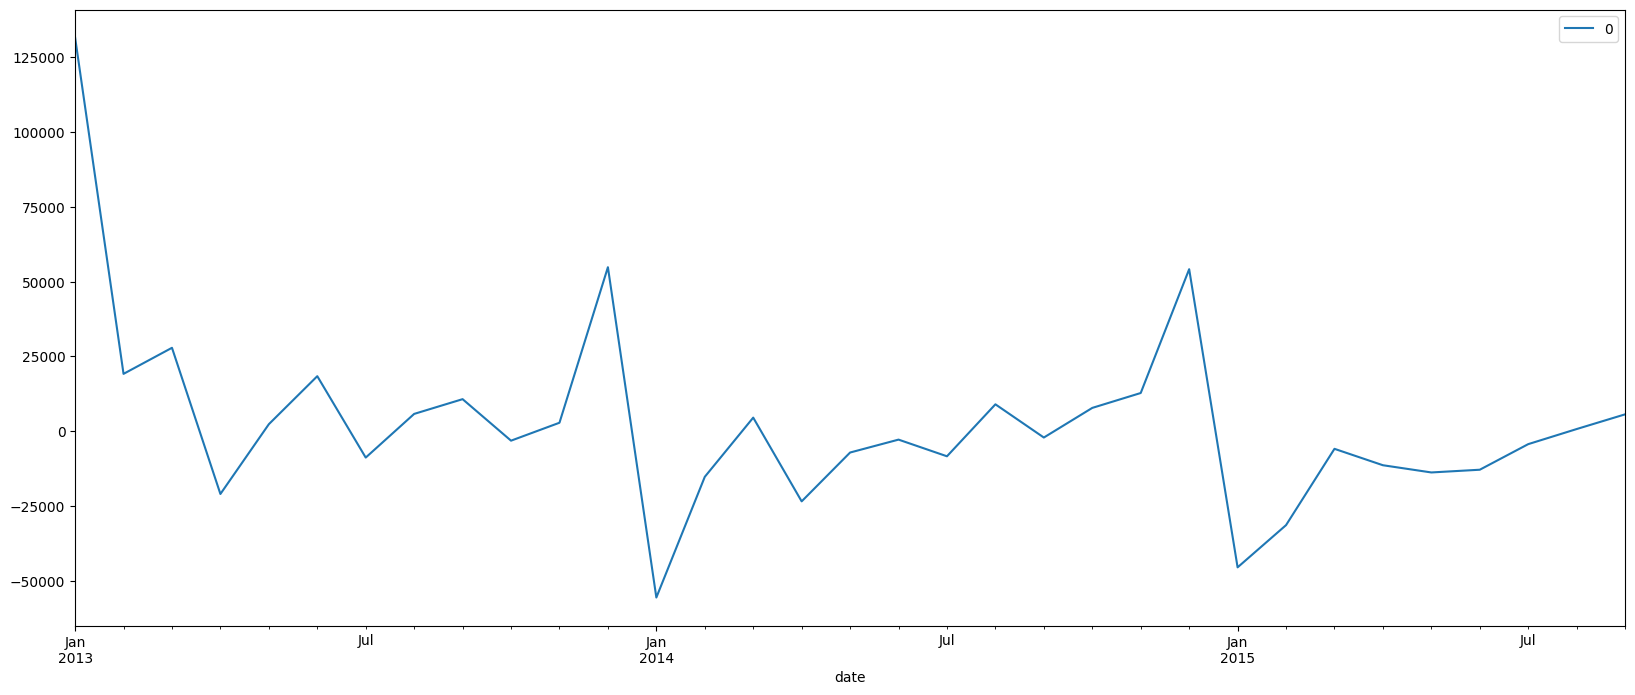

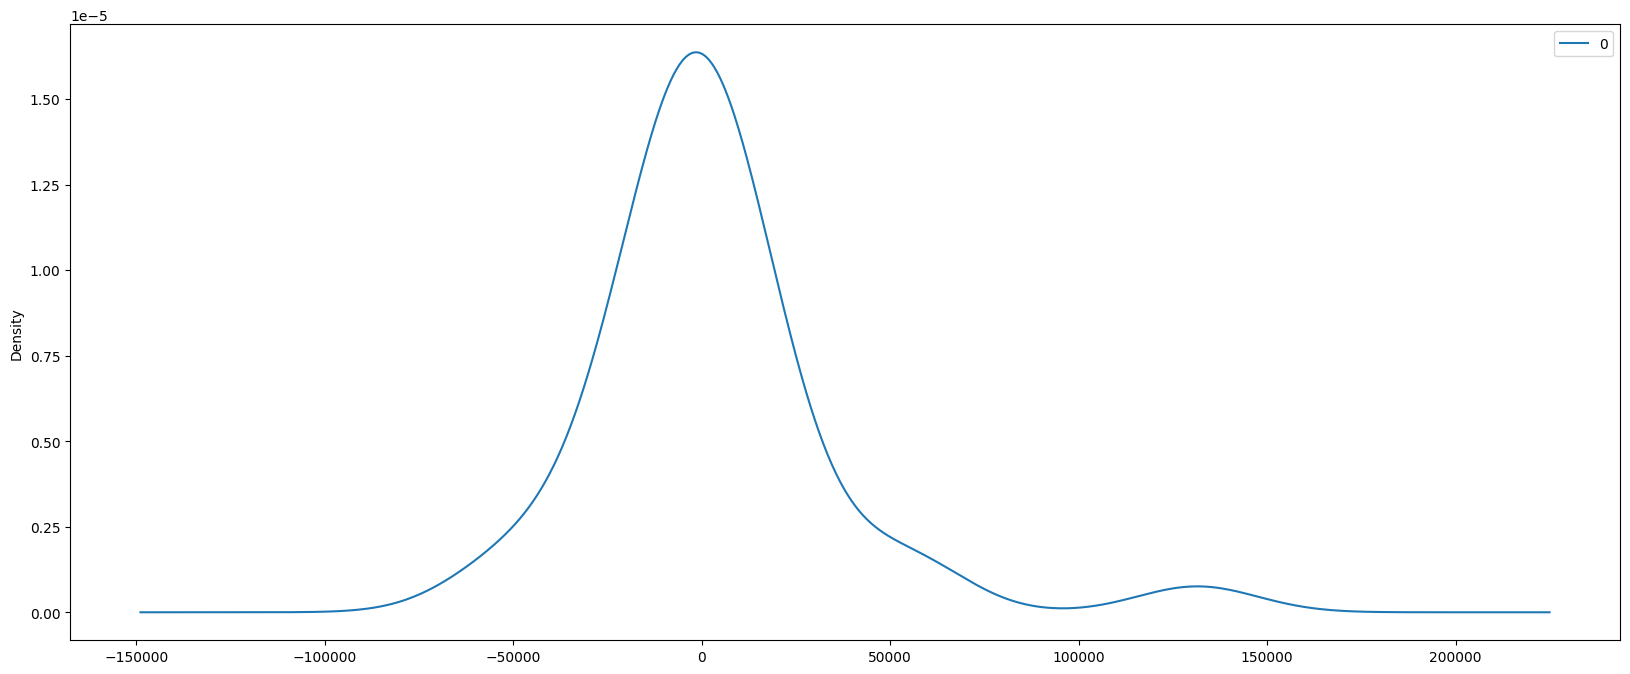

                   0
count      33.000000
mean     2944.504726
std     32124.262080
min    -55457.015758
25%    -11296.331053
50%     -2050.221850
75%      9035.998474
max    131478.000000


In [65]:
# fit model
model = ARIMA(df_for_arima, order=(5,1,0))
model_fit = model.fit()

# summary of fit model
print(model_fit.summary())

# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

# density plot of residuals
residuals.plot(kind='kde')
plt.show()

# summary stats of residuals
print(residuals.describe())

#### plot autocorrelation

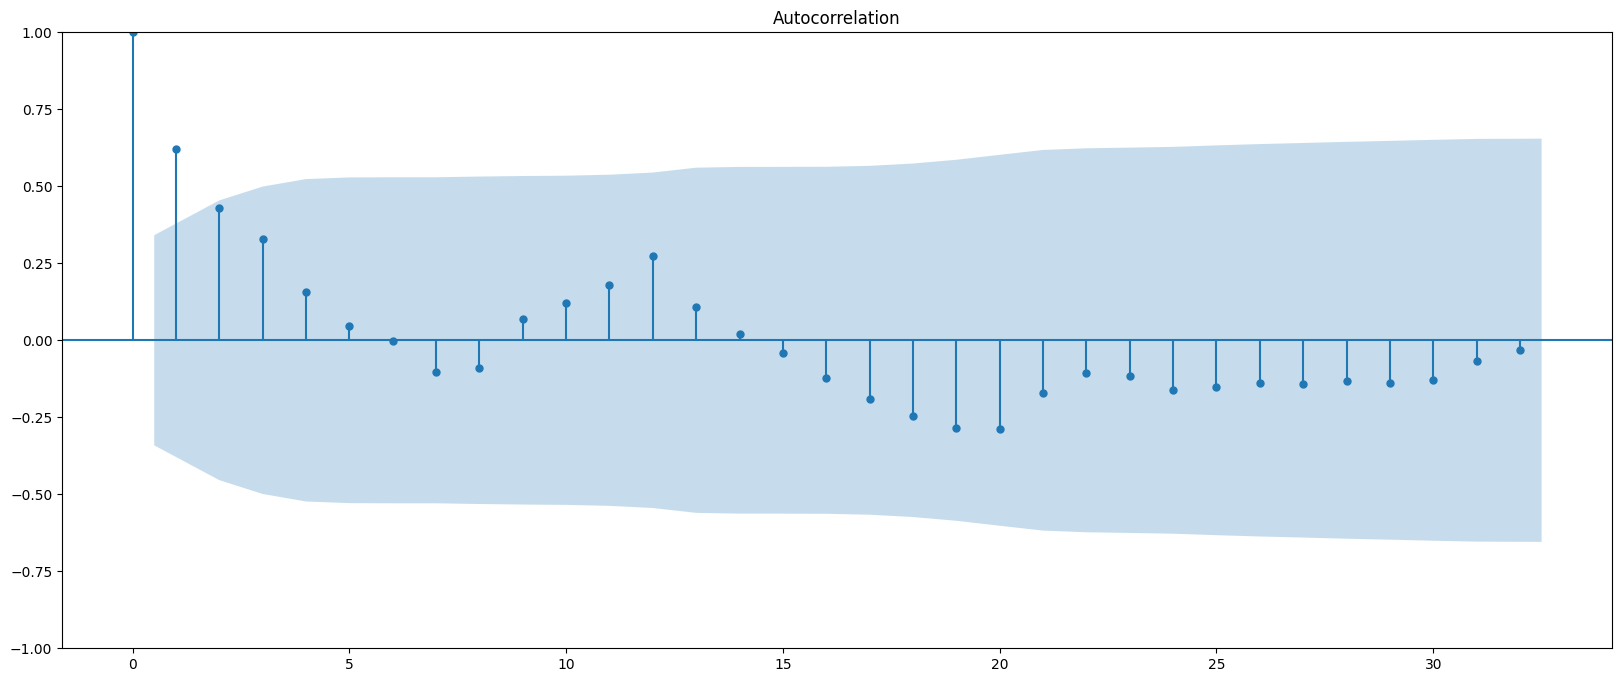

In [68]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_for_arima, lags= 32, alpha=0.05)
plt.show()

### seasonal decompose

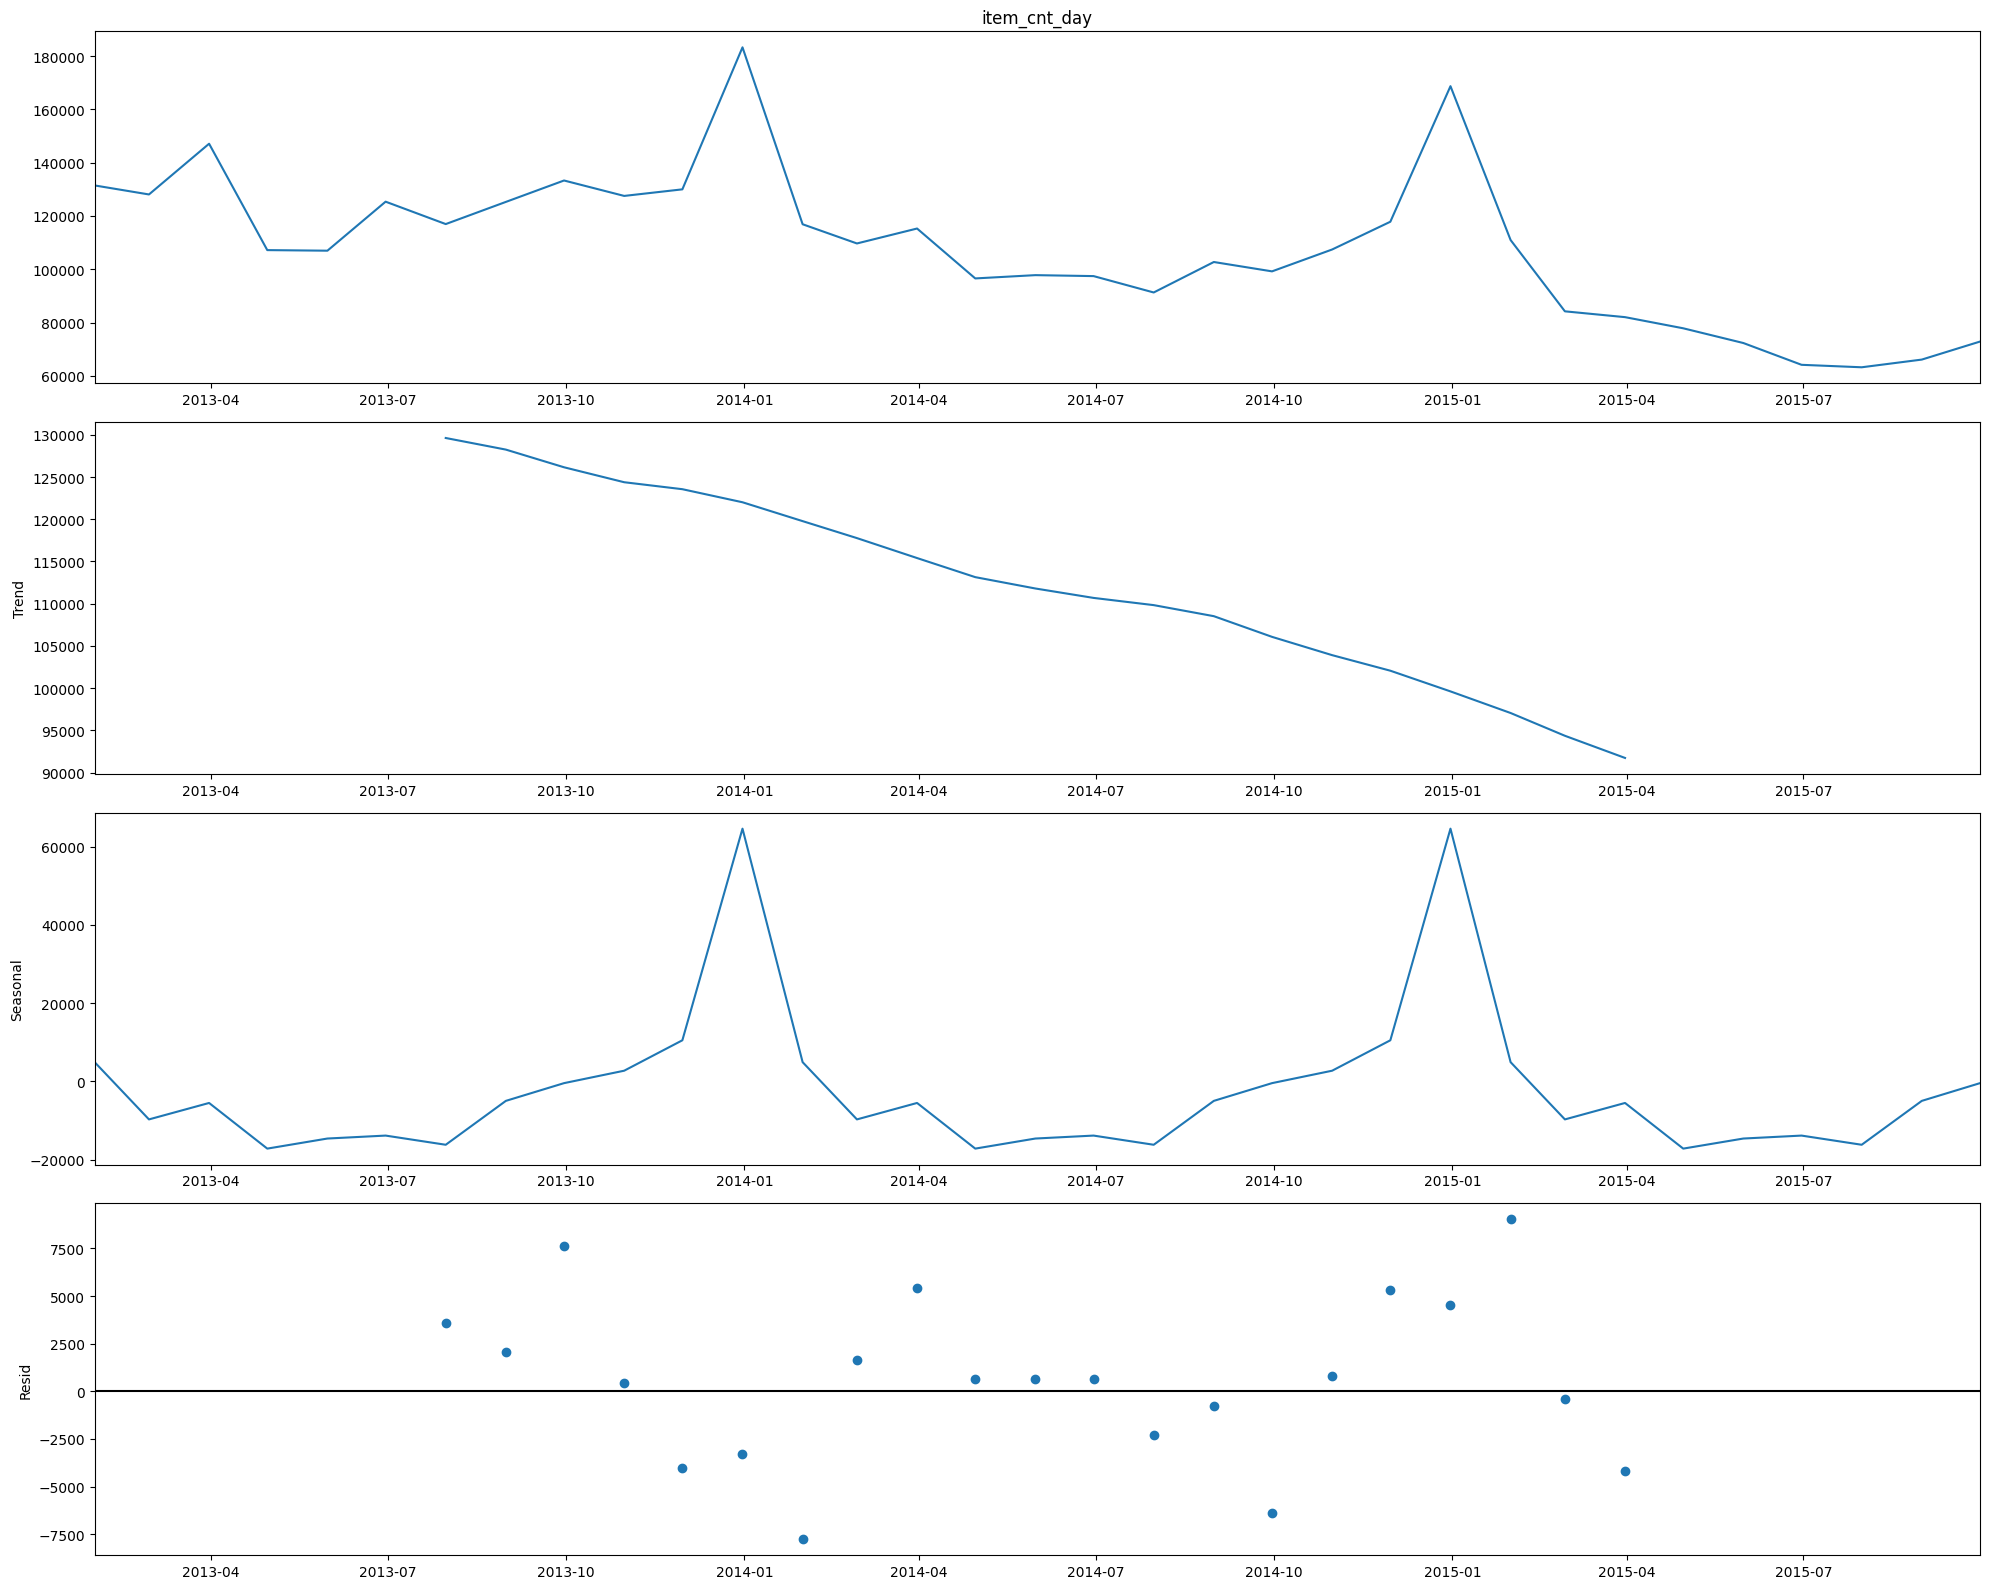

In [90]:
# Additive seasonal decompose
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(df_for_arima, model='additive').plot()
plt.show()

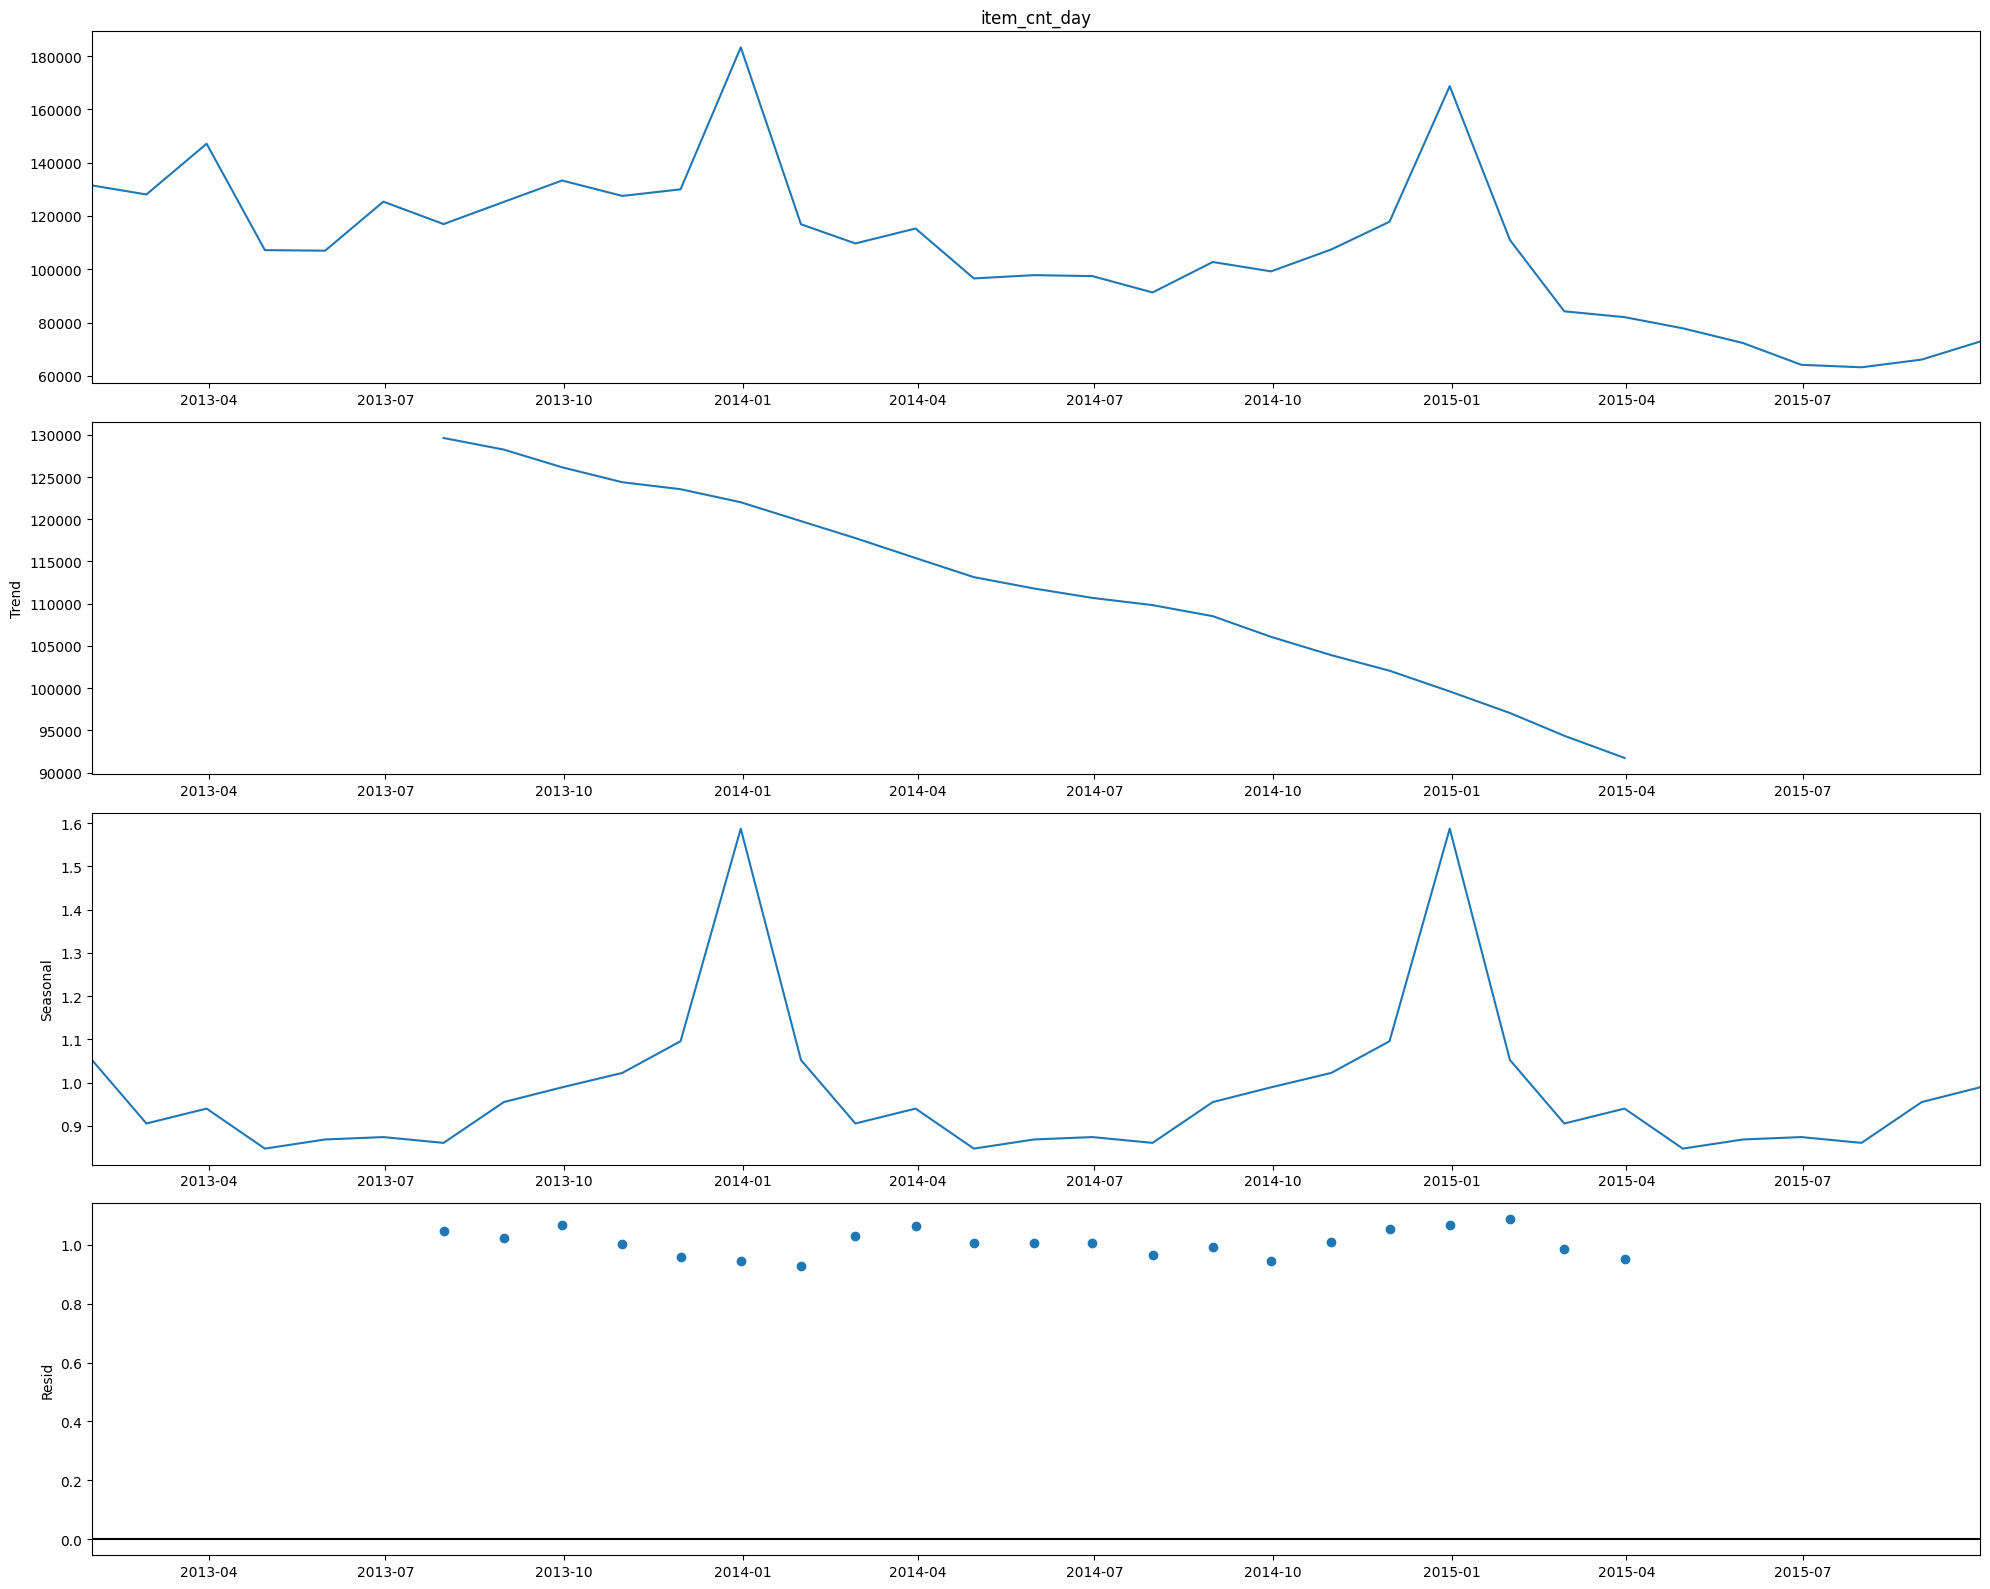

In [91]:
# Multiplicative seasonal decompose

seasonal_decompose(df_for_arima, model='multiplicative').plot()
plt.show()

In [92]:
# There is a clear downward trend 
# There is also clear seasonality (The two peaks at 2014-01 and 2015-01)
# The volatility of the residual is reduced considerably in the multiplicative model compared to the additive model.
# Probably the multiplicative model is the better bet

# 4. ARIMA - Daily

In [71]:
df_for_arima_daily = df_daily.copy().reset_index()
df_for_arima_daily.date = pd.to_datetime(df_for_arima_daily.date)
df_for_arima_daily = df_for_arima_daily.resample(rule='D', on='date')['item_cnt_day'].sum()
df_for_arima_daily.tail()

date
2015-09-26    3075.0
2015-09-27    2818.0
2015-09-28    2275.0
2015-09-29    4209.0
2015-09-30    4068.0
Freq: D, Name: item_cnt_day, dtype: float64

Text(0, 0.5, 'Total item count of the day')

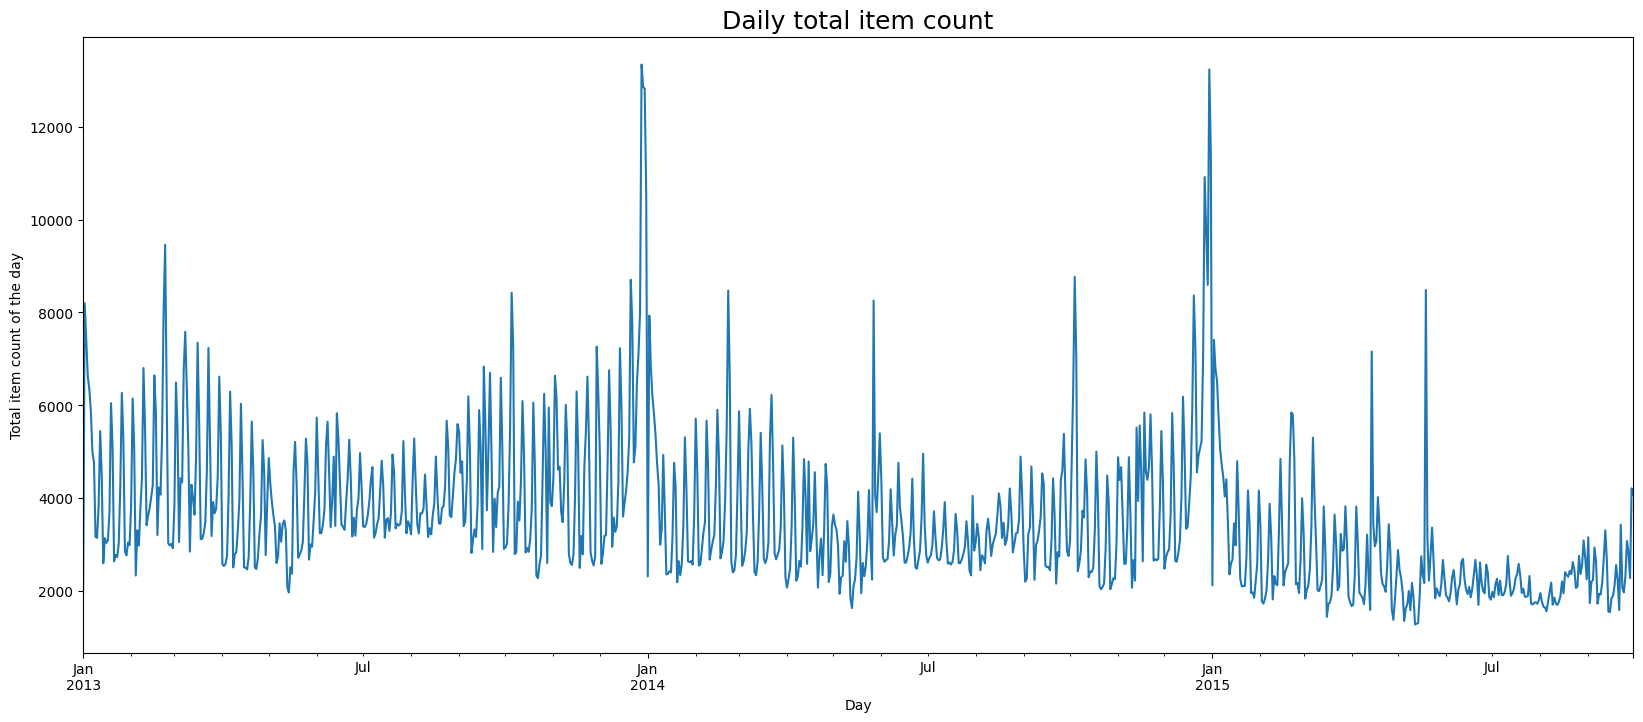

In [72]:
df_for_arima_daily.plot()
plt.title("Daily total item count",
         fontsize = 18)
plt.xlabel("Day")
plt.ylabel("Total item count of the day")

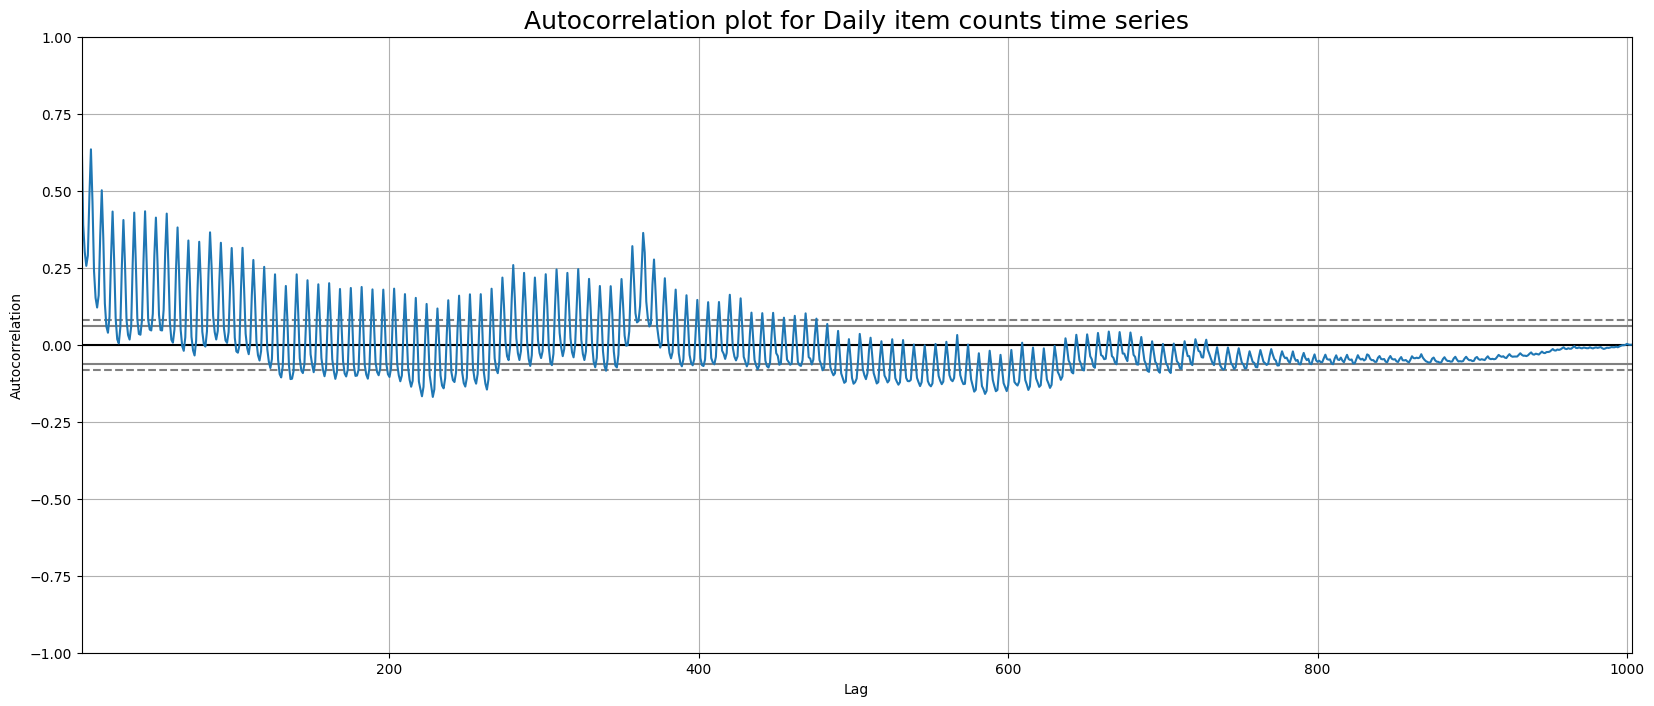

In [73]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df_for_arima_daily)
plt.title("Autocorrelation plot for Daily item counts time series",
         fontsize = 18)
plt.show()

Text(0.5, 1.0, 'Distribution histogram')

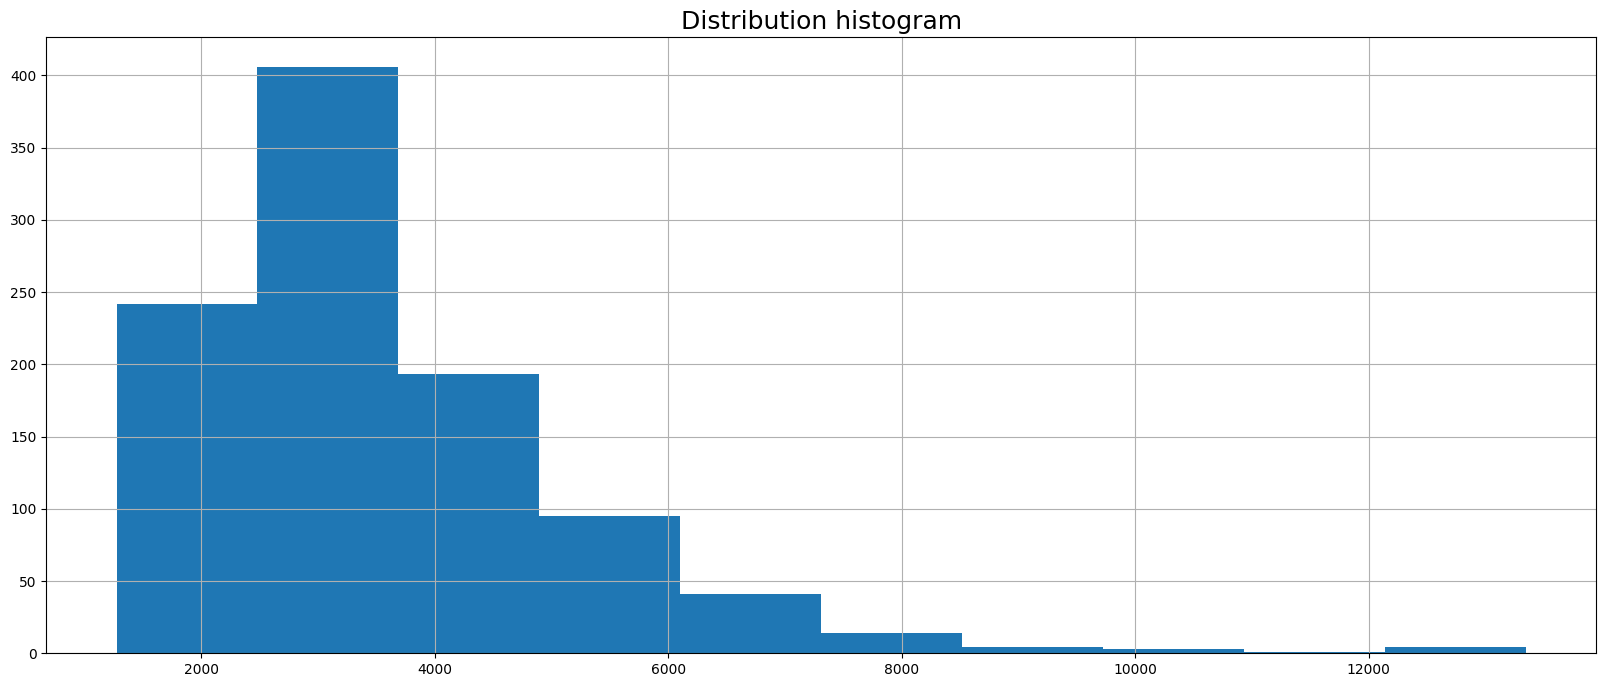

In [74]:
# Lokking at summary statistics
df_for_arima_daily.hist()
plt.title("Distribution histogram",
         fontsize = 18)

In [75]:
# Looking at further summary statistics
X = df_for_arima_daily.values
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=4079.543825, mean2=3052.321357
variance1=2426844.606645, variance2=2077403.814893


In [76]:
#  The mean and variance of each half of the data look very different
print("diff mean = ", (mean1 - mean2).round())
print("diff variance = ", (var2 - var1).round())

diff mean =  1027.0
diff variance =  -349441.0


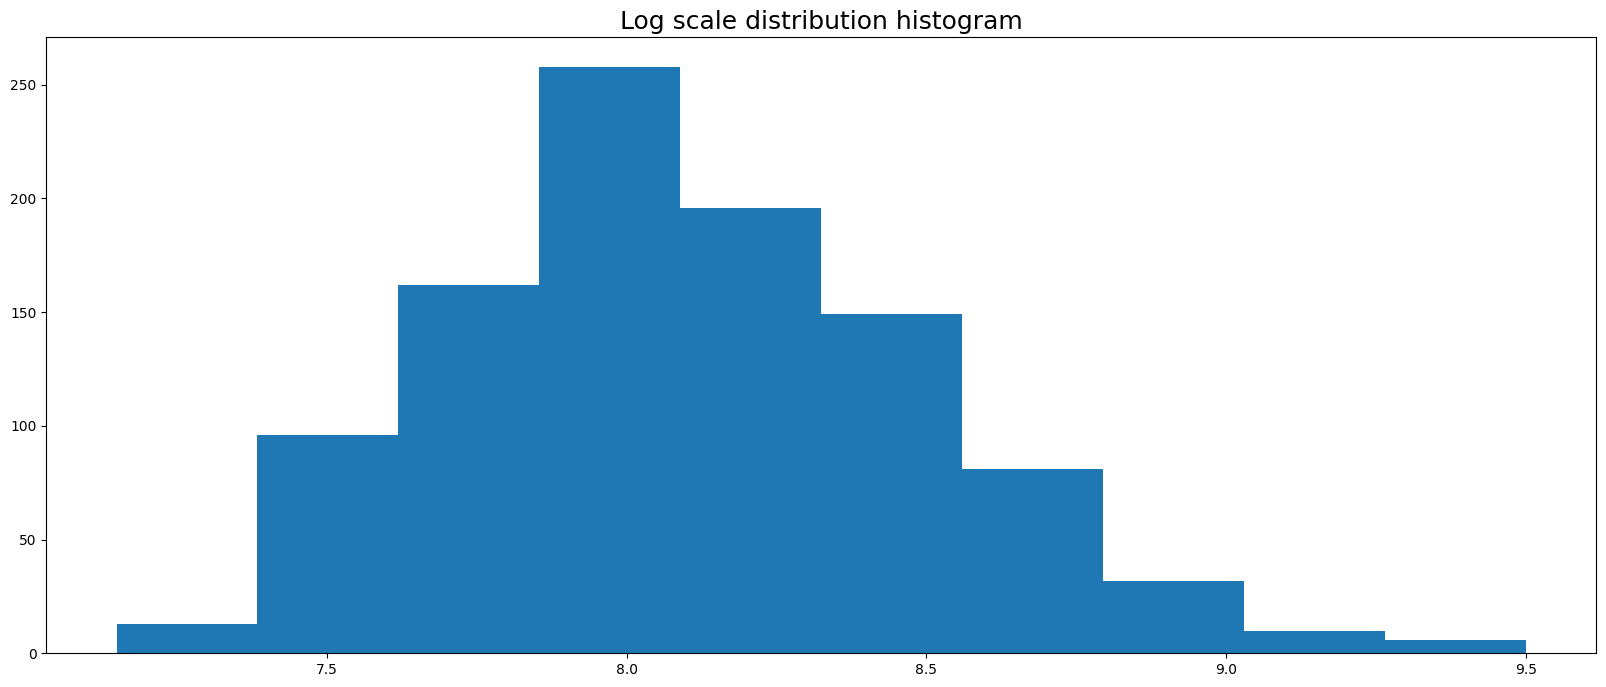

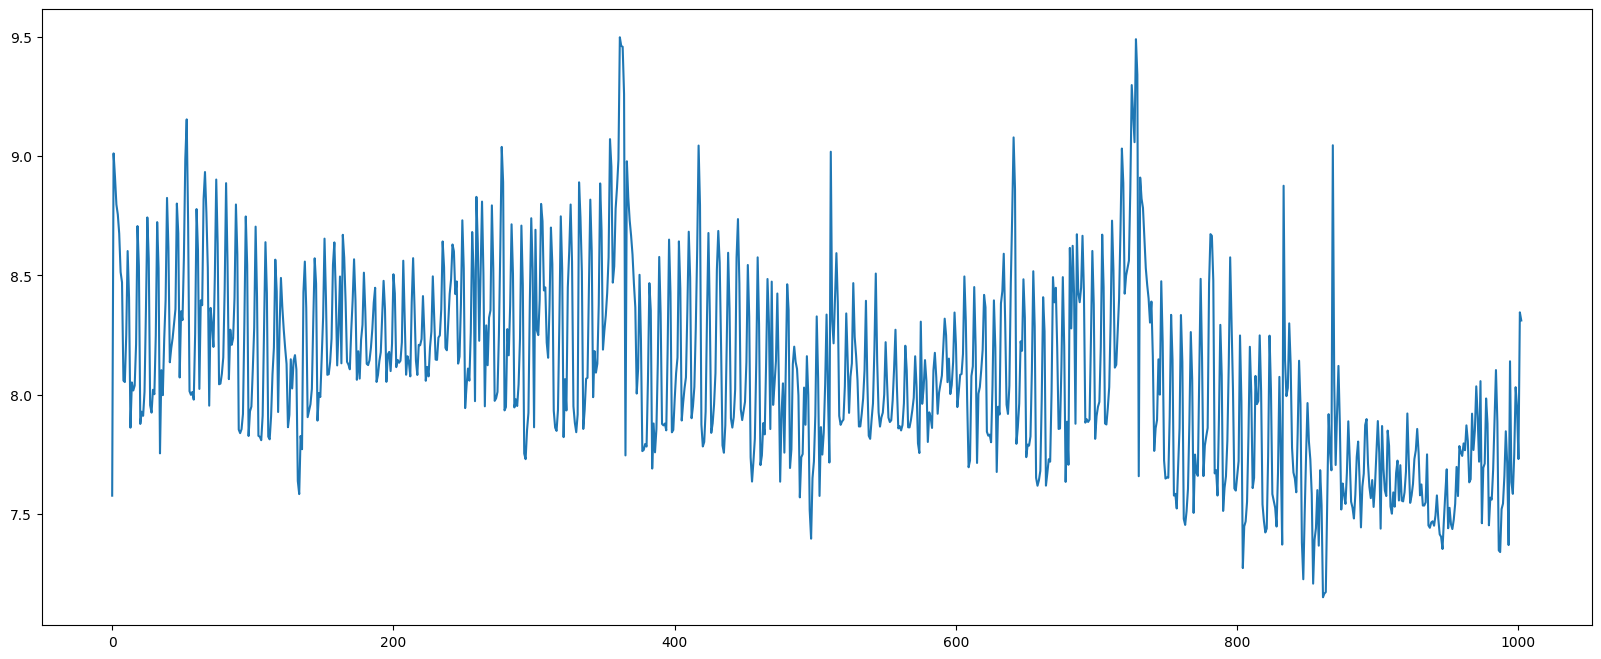

In [77]:
# Looking at the log values distribution
X = df_for_arima_daily.values
X = np.log(X)
plt.title("Log scale distribution histogram",
         fontsize = 18)
plt.hist(X)
plt.show()
plt.plot(X)
plt.show()

In [78]:
# Looking at summary statistics for log transformed data 

X = df_for_arima_daily.values
X = np.log(X)
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=8.252688, mean2=7.943114
variance1=0.115543, variance2=0.143859


In [79]:
# mean and standard deviation values for each group that are similar, but not identical.
print("diff mean = ", (mean1 - mean2).round(5))
print("diff variance = ", (var2 - var1).round(5))

diff mean =  0.30957
diff variance =  0.02832


In [80]:
# Augmented Dickey-Fuller test

from statsmodels.tsa.stattools import adfuller

X = df_for_arima_daily.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.173400
p-value: 0.000731
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


**p-value is < 0.05, the data rejects the null hypothesis.**

**The data does not have a unit root and is stationary**

In [81]:
# Running Augmented Dickey-Fuller test for log values
X = df_for_arima_daily.values
X = np.log(X)
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.383615
p-value: 0.011530
	1%: -3.437
	5%: -2.864
	10%: -2.568


**p-value is > 0.05, the data fails to reject the null hypothesis.**

**The data has a unit root and is not stationary**

                               SARIMAX Results                                
Dep. Variable:           item_cnt_day   No. Observations:                 1003
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -8390.057
Date:                Sun, 18 Jun 2023   AIC                          16792.114
Time:                        19:54:46   BIC                          16821.573
Sample:                    01-01-2013   HQIC                         16803.310
                         - 09-30-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2470      0.017    -14.493      0.000      -0.280      -0.214
ar.L2         -0.4757      0.016    -29.721      0.000      -0.507      -0.444
ar.L3         -0.3220      0.024    -13.153      0.0

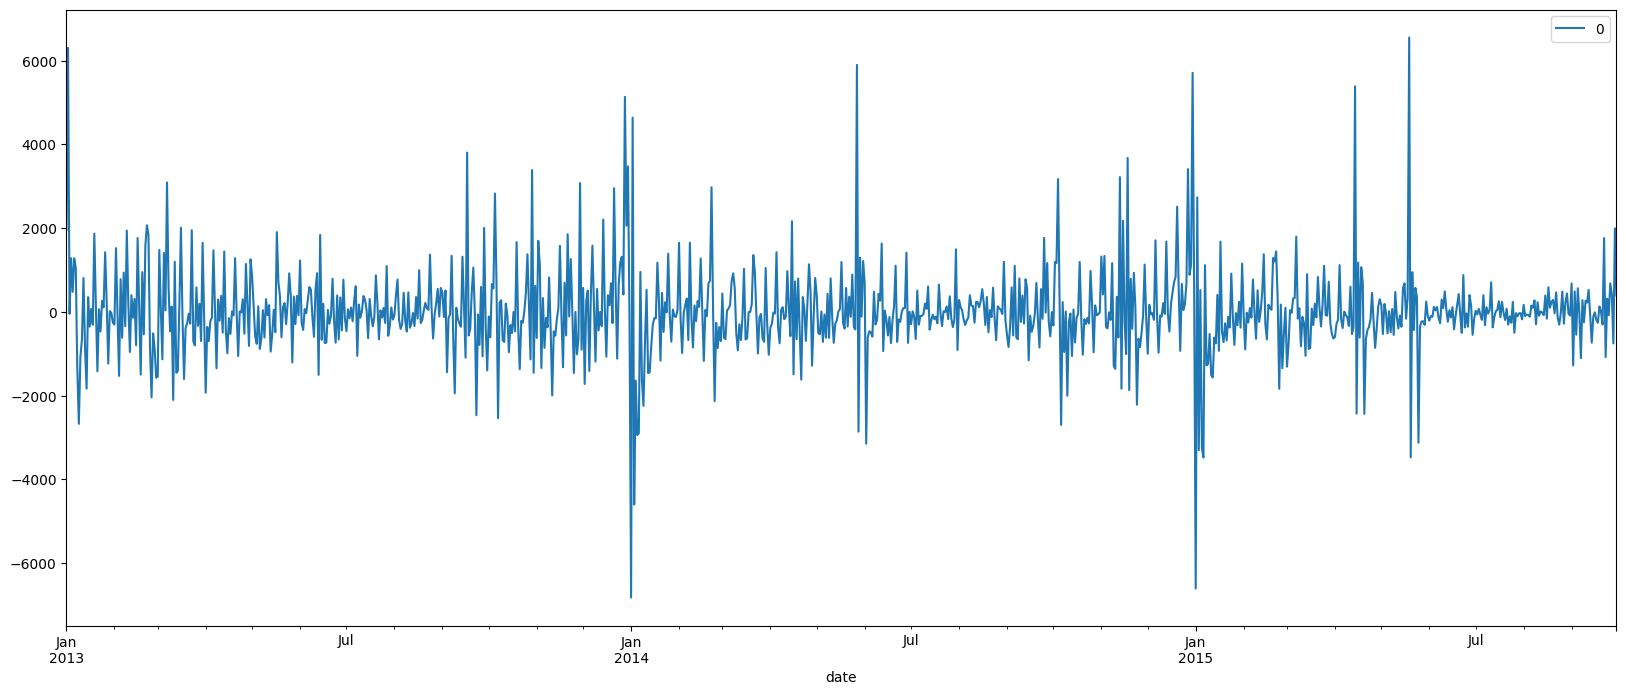

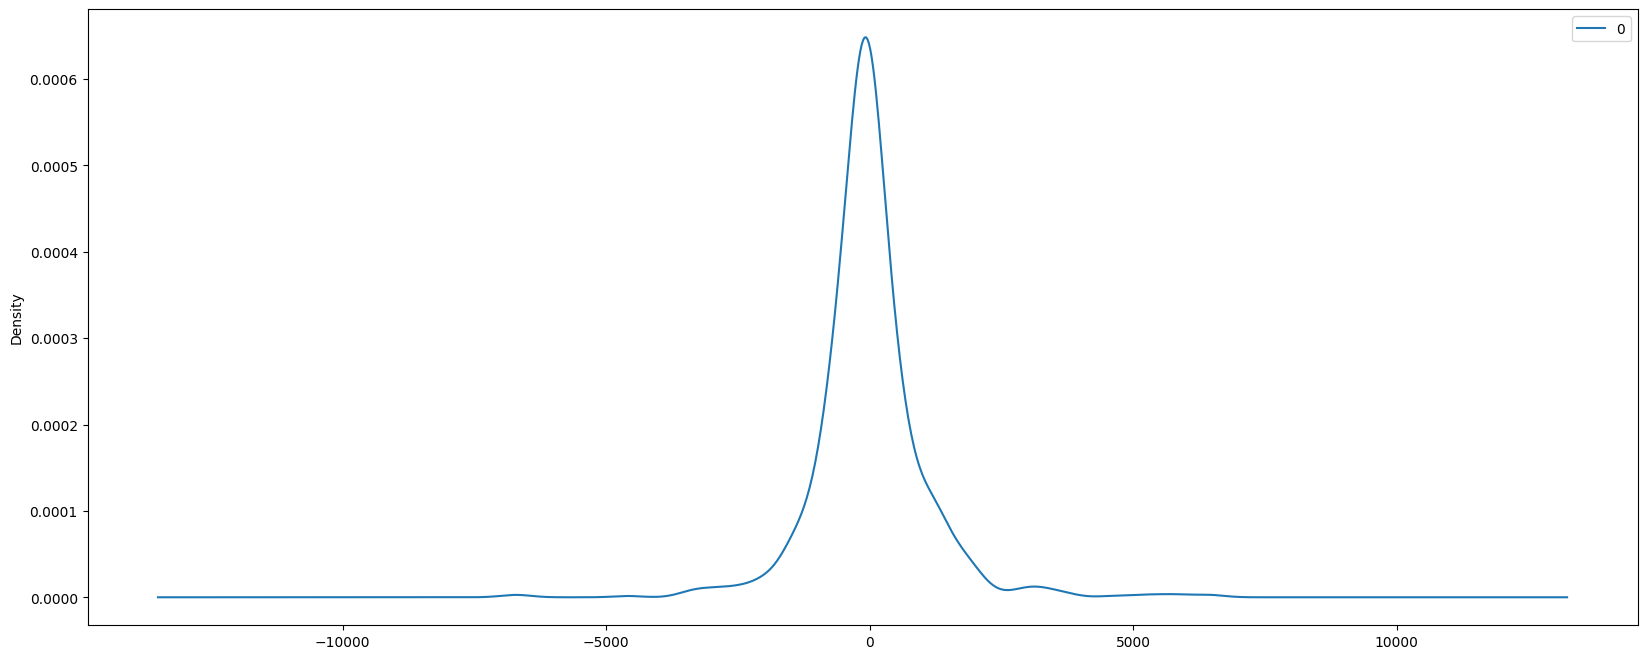

                 0
count  1003.000000
mean      3.850141
std    1055.234688
min   -6817.742713
25%    -411.219931
50%     -61.142632
75%     360.528364
max    6549.580426


In [82]:
# Trying to fit an ARIMA 5, 1, 0 model

# fit model
model = ARIMA(df_for_arima_daily, order=(5,1,0))
model_fit = model.fit()

# summary of fit model
print(model_fit.summary())

# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

# density plot of residuals
residuals.plot(kind='kde')
plt.show()

# summary stats of residuals
print(residuals.describe())

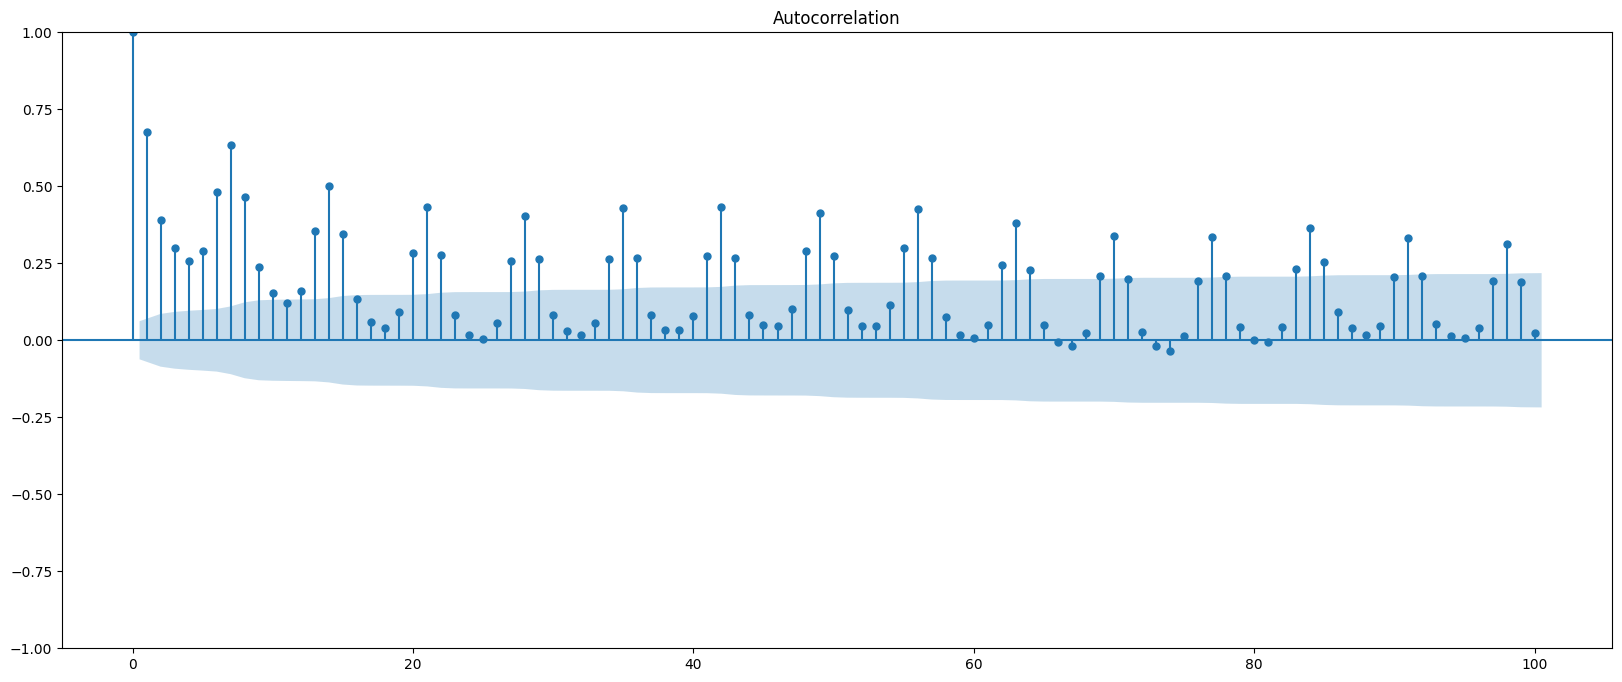

In [83]:
# Plot autocorrelation
plot_acf(df_for_arima_daily, lags= (len(df_for_arima_daily) - 1)/10, alpha=0.05)
plt.show()

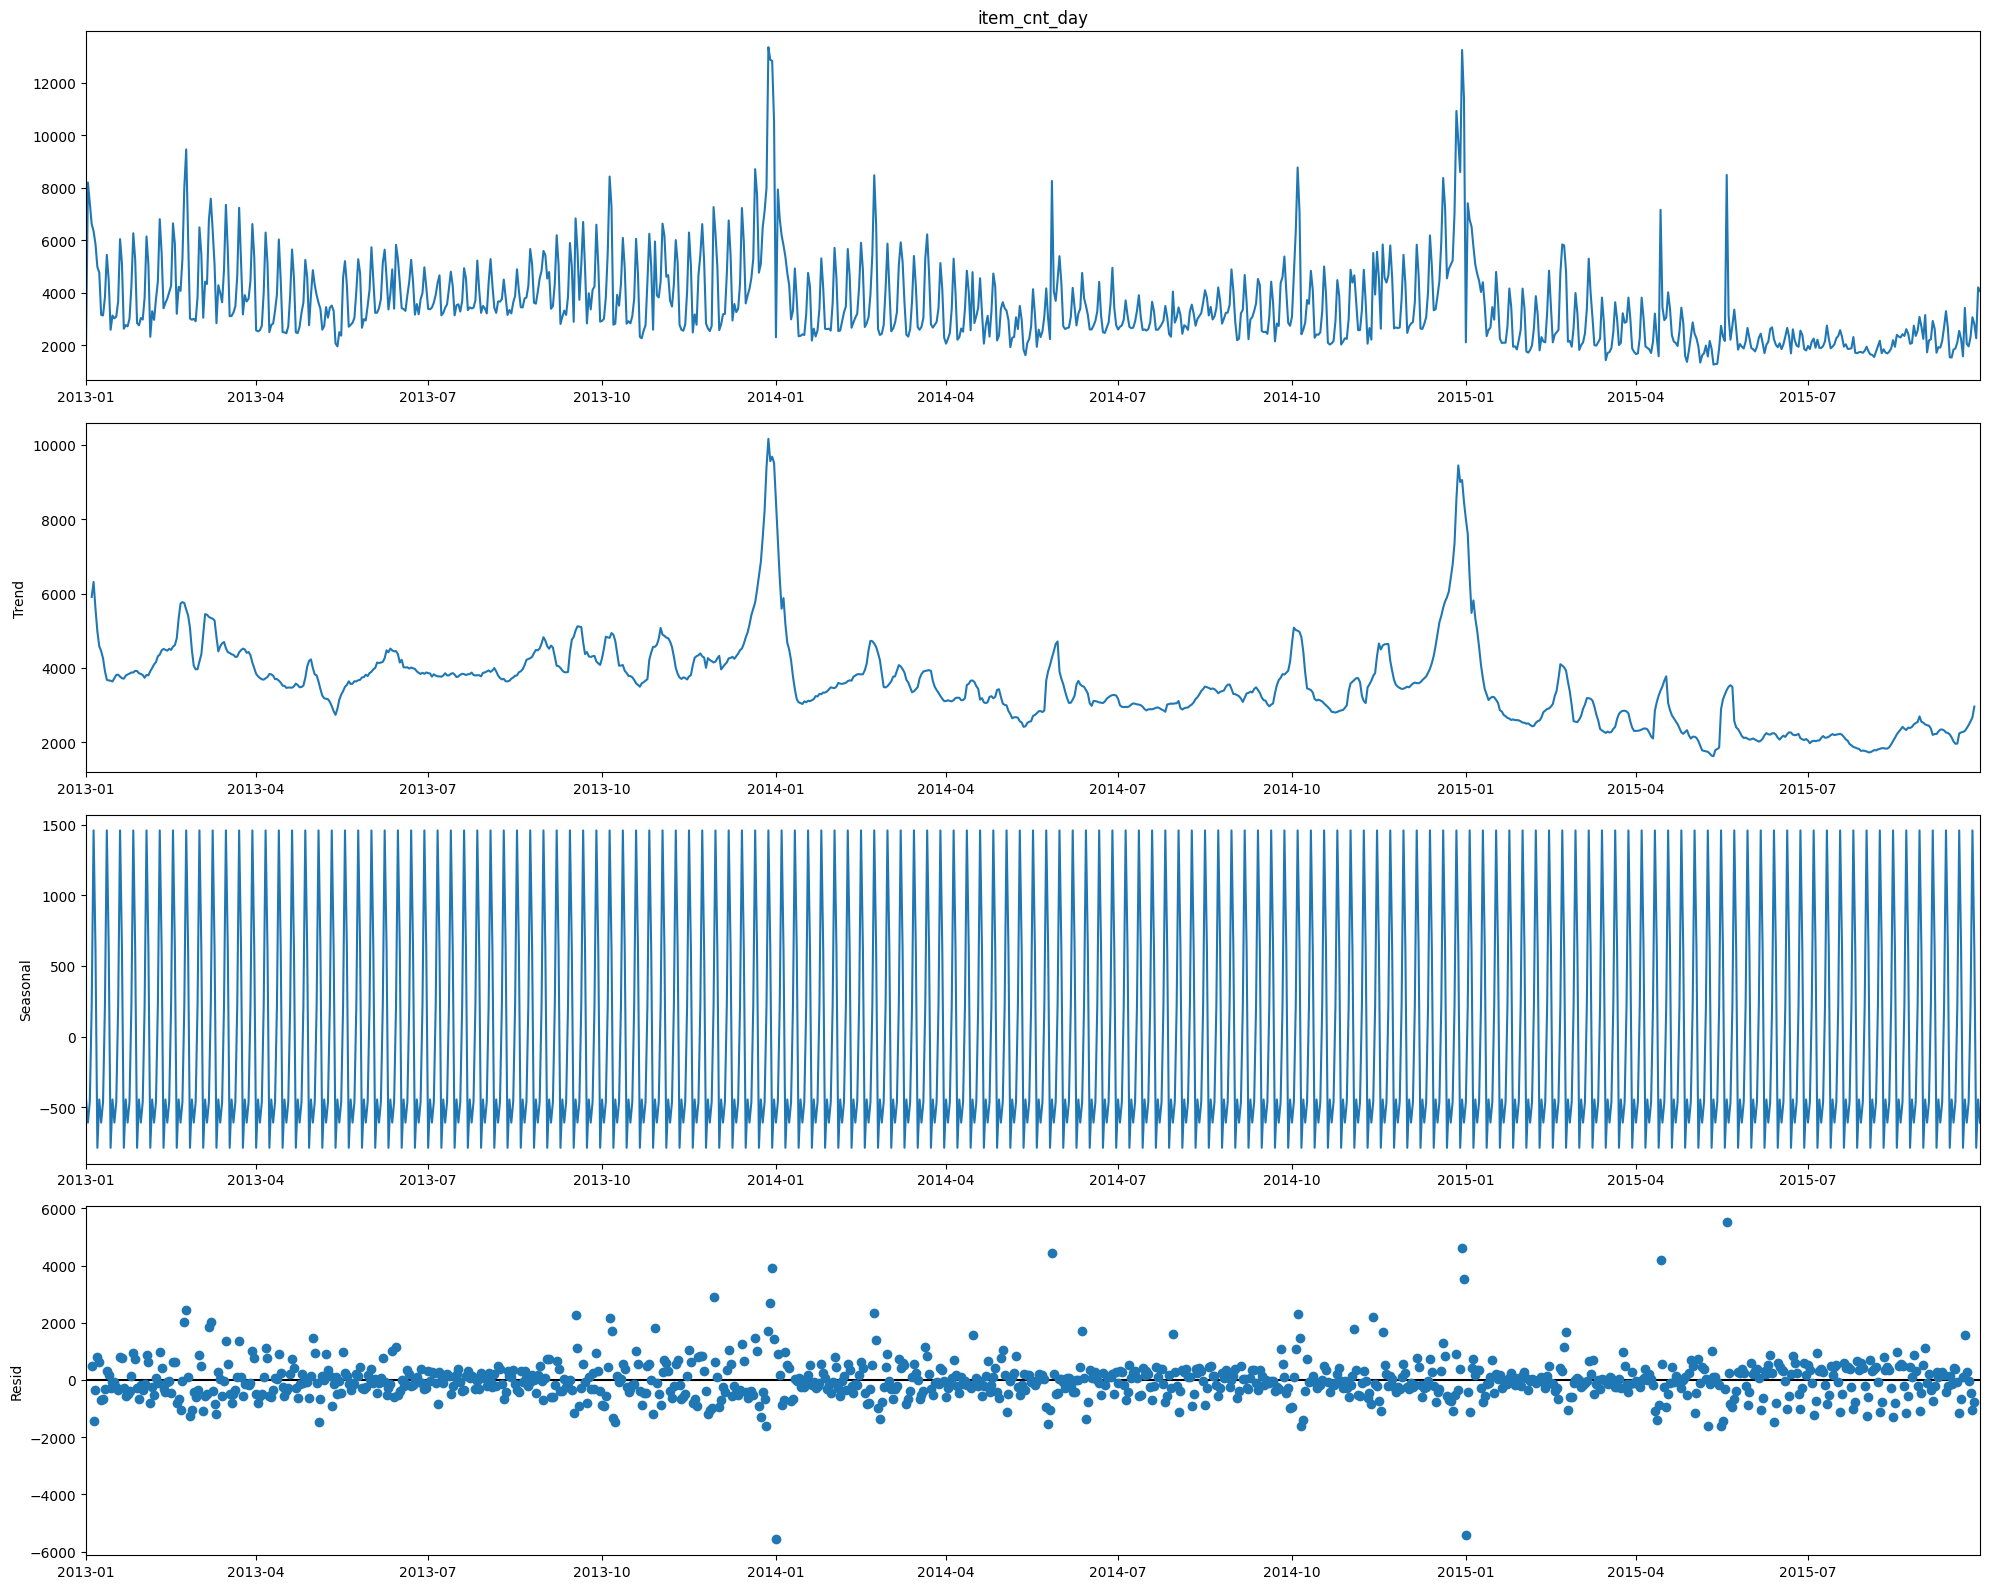

In [87]:
# Additive seasonal decompose

seasonal_decompose(df_for_arima_daily, model='additive').plot()
plt.show()

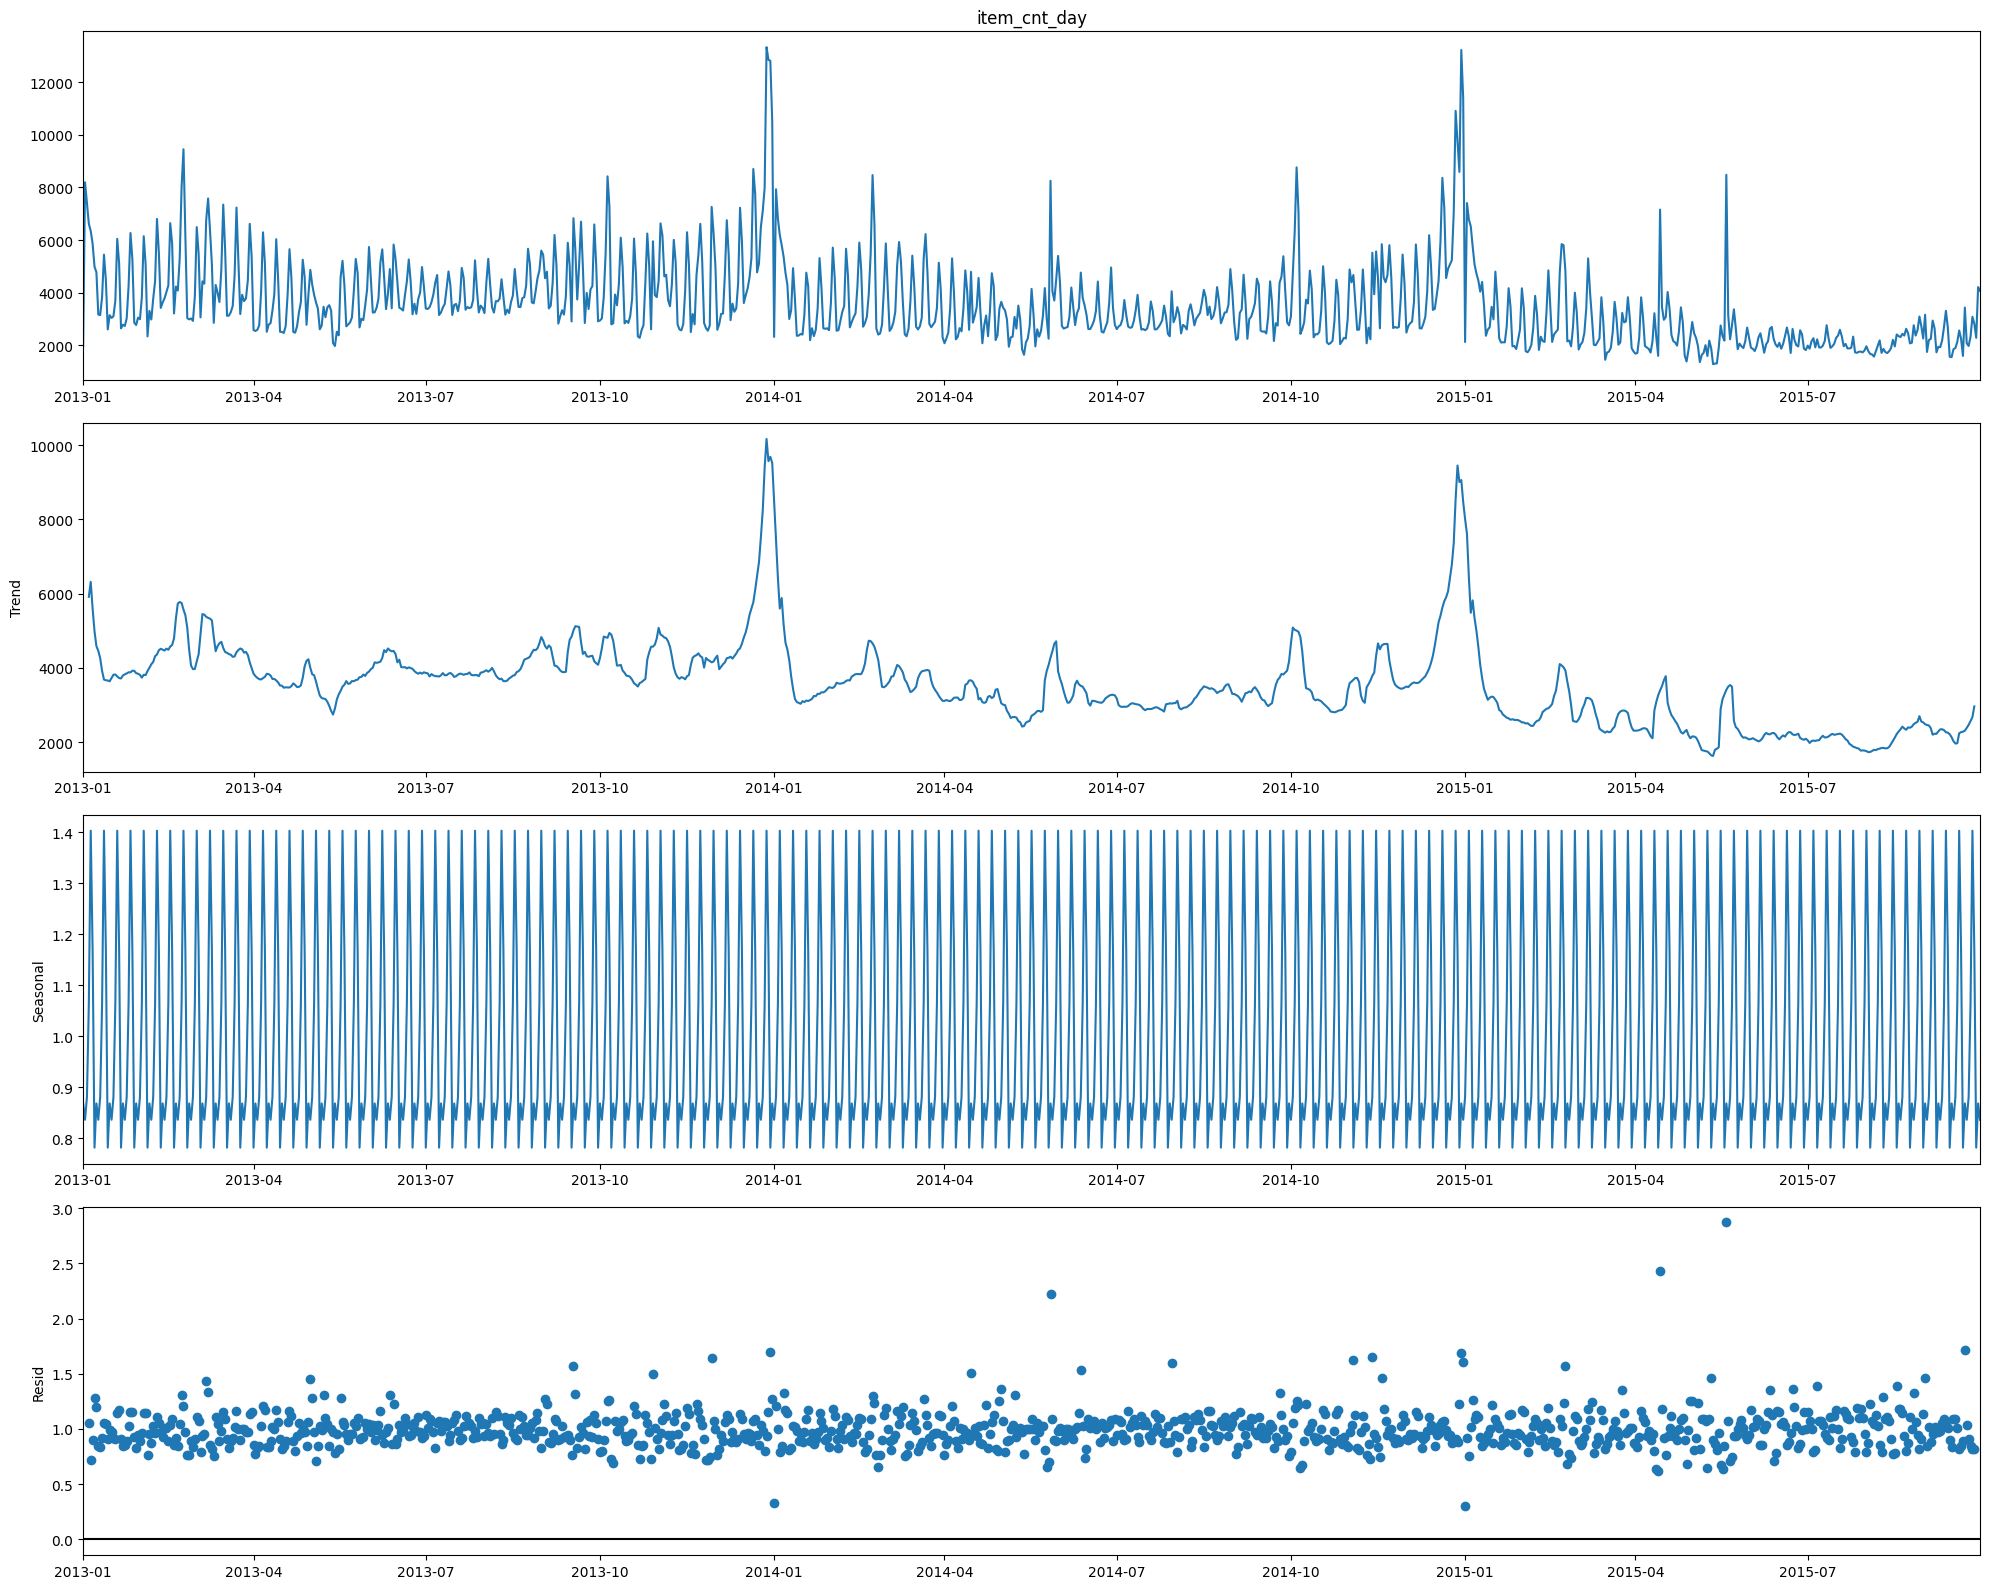

In [88]:
# Multiplicative seasonal decompose

seasonal_decompose(df_for_arima_daily, model='multiplicative').plot()
plt.show()

In [89]:
# There is a slight downward trend
# There is clear seasonality
# Residual improved only slightly when changed from additive model to multiplicative. Could try both models.
